In [1]:
import math
import os
import random
import shutil
import pickle
import matplotlib.colors
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
import tensorflow as tf
import shap
import sys
import copy
import pickle

from matplotlib.pyplot import cm
from scipy.stats import ttest_ind
from scipy.special import softmax
from scipy.stats import rankdata
from scipy.stats import kendalltau
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from alibi.explainers import IntegratedGradients
from alibi.explainers import AnchorText

from sklearn.metrics import precision_score

SEED_VALUE = 3435
os.environ['PYTHONHASHSEED']=str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
warnings.filterwarnings('ignore')
os.chdir(os.getcwd())

In [2]:
from analysis.distributions import *
from analysis.plots import *
from analysis.metrics.consistency import *

In [3]:
# Get the values from the configurations (add manually)

dataset = "SENTIMENT140"
configurations = [
                  "CNN-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-BERT-STATIC-SENTIMENT140-EARLY_STOPPING-2",
                  "CNN-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING",
    
                  "CNN-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "CNN-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  
                  "CNN-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION", 
                  "CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-BERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
    
                  "CNN-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "CNN-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                    
                  "LSTM-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-BERT-STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING",
    
                  "LSTM-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  "LSTM-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  
                  "LSTM-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION", 
                  "LSTM-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-BERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
    
                  "LSTM-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                  "LSTM-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION"
                 ]

# dataset = "SST2"
# configurations = [
#                   "CNN-WORD2VEC-STATIC-NESTED_CV",
#                   "CNN-GLOVE-STATIC-NESTED_CV",
#                   "CNN-ELMO-STATIC-SST2-NESTED_CV",
#                   "CNN-BERT-STATIC-SST2-NESTED_CV",
#                   "CNN-sentiBERT-STATIC-SST2-NESTED_CV",
        
#                   "CNN-WORD2VEC-NON_STATIC-NESTED_CV",
#                   "CNN-GLOVE-NON_STATIC-NESTED_CV",
#                   "CNN-ELMO-NON_STATIC-SST2-NESTED_CV",
#                   "CNN-BERT-NON_STATIC-SST2-NESTED_CV",
#                   "CNN-sentiBERT-NON_STATIC-SST2-NESTED_CV",
                  
#                   "CNN-WORD2VEC-STATIC-NESTED_CV-DISTILLATION", 
#                   "CNN-GLOVE-STATIC-NESTED_CV-DISTILLATION",
#                   "CNN-ELMO-STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "CNN-BERT-STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "CNN-sentiBERT-STATIC-SST2-NESTED_CV-DISTILLATION",
    
#                   "CNN-WORD2VEC-NON_STATIC-NESTED_CV-DISTILLATION",
#                   "CNN-GLOVE-NON_STATIC-NESTED_CV-DISTILLATION",
#                   "CNN-ELMO-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "CNN-BERT-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "CNN-sentiBERT-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
                    
#                   "LSTM-WORD2VEC-STATIC-SST2-NESTED_CV",
#                   "LSTM-GLOVE-STATIC-SST2-NESTED_CV",
#                   "LSTM-ELMO-STATIC-SST2-NESTED_CV-2",
#                   "LSTM-BERT-STATIC-SST2-NESTED_CV",
#                   "LSTM-sentiBERT-STATIC-SST2-NESTED_CV",
    
#                   "LSTM-WORD2VEC-NON_STATIC-SST2-NESTED_CV",
#                   "LSTM-GLOVE-NON_STATIC-SST2-NESTED_CV",
#                   "LSTM-ELMO-NON_STATIC-SST2-NESTED_CV",
#                   "LSTM-BERT-NON_STATIC-SST2-NESTED_CV",
#                   "LSTM-sentiBERT-NON_STATIC-SST2-NESTED_CV",
                  
#                   "LSTM-WORD2VEC-STATIC-SST2-NESTED_CV-DISTILLATION", 
#                   "LSTM-GLOVE-STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "LSTM-ELMO-STATIC-SST2-NESTED_CV-DISTILLATION-2",
#                   "LSTM-BERT-STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "LSTM-sentiBERT-STATIC-SST2-NESTED_CV-DISTILLATION",
    
#                   "LSTM-WORD2VEC-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "LSTM-GLOVE-NON_STATIC-SST2-NESTED_CV-DISTILLATION"
#                   "LSTM-ELMO-NON_STATIC-SST2-NESTED_CV-DISTILLATION-2",
#                   "LSTM-BERT-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
#                   "LSTM-sentiBERT-NON_STATIC-SST2-NESTED_CV-DISTILLATION"
#                 ]

distributions = {}
for config in configurations:
    try:
        base_model = config.split("-")[0]
        if base_model not in list(distributions.keys()):
            distributions[base_model] = {}

        word_vectors = config.split("-")[1]
        if word_vectors not in list(distributions[base_model].keys()):
            distributions[base_model][word_vectors] = {}

        fine_tuning = config.split("-")[2]
        if fine_tuning not in list(distributions[base_model][word_vectors].keys()):
            distributions[base_model][word_vectors][fine_tuning] = {}

        dataset = config.split("-")[3]
        if dataset not in list(distributions[base_model][word_vectors][fine_tuning].keys()):
            distributions[base_model][word_vectors][fine_tuning][dataset] = {}

        validation_method = config.split("-")[4]
        if validation_method not in list(distributions[base_model][word_vectors][fine_tuning][dataset].keys()):
            distributions[base_model][word_vectors][fine_tuning][dataset][validation_method] = {}

        if "DISTILLATION" in config.split("-"):
            distillation = config.split("-")[5]
            if distillation not in list(distributions[base_model][word_vectors][fine_tuning][dataset][validation_method].keys()):
                distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation] = {}
    except:
        base_model = config.split("-")[0]
        if base_model not in list(distributions.keys()):
            distributions[base_model] = {}

        word_vectors = config.split("-")[1]
        if word_vectors not in list(distributions[base_model].keys()):
            distributions[base_model][word_vectors] = {}

        fine_tuning = config.split("-")[2]
        if fine_tuning not in list(distributions[base_model][word_vectors].keys()):
            distributions[base_model][word_vectors][fine_tuning] = {}

        validation_method = config.split("-")[3]
        if validation_method not in list(distributions[base_model][word_vectors][fine_tuning].keys()):
            distributions[base_model][word_vectors][fine_tuning][validation_method] = {}

        if "DISTILLATION" in config.split("-"):
            distillation = config.split("-")[4]
            if distillation not in list(distributions[base_model][word_vectors][fine_tuning][validation_method].keys()):
                distributions[base_model][word_vectors][fine_tuning][validation_method][distillation] = {}

In [4]:
# Calculate all metrics for all configurations in distributions

#### Performance results ####
distributions = performance_distributions(configurations, distributions)

#### PERCY results ####
distributions = lime_acc_for_distributions(configurations, distributions)
distributions = shap_acc_for_distributions(configurations, distributions)
distributions = int_grad_acc_for_distributions(configurations, distributions)

# #### Lipschitz scores ####
# distributions = lime_explanations_lipschitz_scores(configurations, distributions)
# distributions = shap_explanations_lipschitz_scores(configurations, distributions)
# distributions = int_grad_explanations_lipschitz_scores(configurations, distributions)

In [5]:
# Configurations table
models = []
for config in configurations:
    if config.split("-")[3] in ["SENTIMENT140", "SST2"]:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = config.split("-")[3]
        validation_method = config.split("-")[4]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[5]    
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])
        else:
            distillation = "NO_DIST"
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])
    else:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = "SST2"
        validation_method = config.split("-")[3]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[4]
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])
        else:
            distillation = "NO_DIST"
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])

updated_models = []
base_model = []
distillation = []
fine_tuned = []
word_embeddings = []
proposed_for_rule_dissemination = []

for index, model in enumerate(models):
    updated_model = ""
    
    if model[0] == "C":
        base_model.append("CNN (C)")
        updated_model = updated_model + "C"
    elif model[0] == "L":
        base_model.append("LSTM (L)")
        updated_model = updated_model + "L"
    
    if model[1] == "N":
        distillation.append('x')
    elif model[1] == "D":
        distillation.append('\checkmark (D)')
        updated_model = updated_model + "D"
    
    if model[2] == "S":
        fine_tuned.append('x')
    elif model[2] == "F":
        fine_tuned.append('\checkmark (F)')
        updated_model = updated_model + "F"
    
    if model[3] == "W":
        word_embeddings.append('word2vec (W)')
        updated_model = updated_model + "W"
    elif model[3] == "G":
        word_embeddings.append('glove (G)')
        updated_model = updated_model + "G"
    elif model[3] == "E":
        word_embeddings.append('elmo (E)')
        updated_model = updated_model + "E"
    elif model[3] == "B":
        word_embeddings.append('bert (B)')
        updated_model = updated_model + "B"
    elif model[3] == "s":
        word_embeddings.append('sentibert (sB)')
        updated_model = updated_model + "sB"
    updated_models.append(updated_model)
    
    if "D" in updated_model:
        proposed_for_rule_dissemination.append('\checkmark')
    elif "sB" in updated_model:
        proposed_for_rule_dissemination.append('\checkmark')
    elif "F" in updated_model:
        if "E" in updated_model or "B" in updated_model:
            proposed_for_rule_dissemination.append('\checkmark')
        else:
            proposed_for_rule_dissemination.append('x')
    elif "S" in list(updated_model):
        if "E" in list(updated_model) or "B" in list(updated_model):
            proposed_for_rule_dissemination.append('\checkmark')
        else:
            proposed_for_rule_dissemination.append('x')
    else:
        proposed_for_rule_dissemination.append('x')
        
data = {"model":updated_models,
       "base_model":base_model,
       "distillation":distillation,
       "fine_tuned":fine_tuned,
       "word_embeddings":word_embeddings,
       "method_proposed_for_rule_dissemination":proposed_for_rule_dissemination}

dataframe = pd.DataFrame(data)
dataframe.index += 1 
# dataframe = dataframe.set_index('model')
def remove_textbackslash(latex_code):
    latex_code = latex_code.replace("textbackslash ", "")
    return latex_code

dataframe_to_latex = remove_textbackslash(dataframe.to_latex())
# print(dataframe_to_latex)

In [6]:
# Latex tables
models = []
proposed_for_rule_dissemination = []
sentiment_accuracy = []
precisions = []
recalls = []
f1_scores = []

percy_lime = []
percy_shap = []
percy_int_grad = []

sentiment_accuracy_dist = []
percy_lime_dist = []
percy_shap_dist = []
percy_int_grad_dist = []

percy_lime_dist_pearson = []
percy_shap_dist_pearson = []
percy_int_grad_dist_pearson = []

for config in configurations:
    if config.split("-")[3] in ["SENTIMENT140", "SST2"]:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = config.split("-")[3]
        validation_method = config.split("-")[4]
        if "DISTILLATION" in list(config.split("-")):
            
            distillation = config.split("-")[5]
            
            sent_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["sent_acc"]
            sentiment_accuracy_dist = sentiment_accuracy_dist + sent_acc
            sent_acc_val = sum(sent_acc)/len(sent_acc)
            lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime"]
            percy_lime_dist = percy_lime_dist + lime
            lime_acc_val = sum(lime)/len(lime)
            shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_shap"]
            percy_shap_dist = percy_shap_dist + shap
            shap_acc_val = sum(shap)/len(shap)
            int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_int_grad"]
            percy_int_grad_dist = percy_int_grad_dist + int_grad
            int_grad_acc_val = sum(int_grad)/len(int_grad)
            sentiment_accuracy.append(sent_acc_val)
            percy_lime.append(lime_acc_val)
            percy_shap.append(shap_acc_val)
            percy_int_grad.append(int_grad_acc_val)
            
            precision = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["precision"]
            recall = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["recall"]
            f1_score = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["f1_score"]
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1_score)
            
            lime_dist_pearson = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime_pearson"]
            percy_lime_dist_pearson = percy_lime_dist_pearson + lime_dist_pearson
            shap_dist_pearson = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_shap_pearson"]
            percy_shap_dist_pearson = percy_shap_dist_pearson + shap_dist_pearson
            int_grad_dist_pearson = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_int_grad_pearson"]
            percy_int_grad_dist_pearson = percy_int_grad_dist_pearson + int_grad_dist_pearson
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            if word_vectors == "sentiBERT":
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+"sB")
            else:
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])

        else:
            distillation = "NO_DIST"
            
            sent_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["sent_acc"]
            sentiment_accuracy_dist = sentiment_accuracy_dist + sent_acc
            sent_acc_val = sum(sent_acc)/len(sent_acc)
            lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime"]
            percy_lime_dist = percy_lime_dist + lime
            lime_acc_val = sum(lime)/len(lime)
            shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_shap"]
            percy_shap_dist = percy_shap_dist + shap
            shap_acc_val = sum(shap)/len(shap)
            int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_int_grad"]
            percy_int_grad_dist = percy_int_grad_dist + int_grad
            int_grad_acc_val = sum(int_grad)/len(int_grad)
            sentiment_accuracy.append(sent_acc_val)
            percy_lime.append(lime_acc_val)
            percy_shap.append(shap_acc_val)
            percy_int_grad.append(int_grad_acc_val)
            
            lime_dist_pearson = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime_pearson"]
            percy_lime_dist_pearson = percy_lime_dist_pearson + lime_dist_pearson
            shap_dist_pearson = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_shap_pearson"]
            percy_shap_dist_pearson = percy_shap_dist_pearson + shap_dist_pearson
            int_grad_dist_pearson = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_int_grad_pearson"]
            percy_int_grad_dist_pearson = percy_int_grad_dist_pearson + int_grad_dist_pearson
            
            precision = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["precision"]
            recall = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["recall"]
            f1_score = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["f1_score"]
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1_score)
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            if word_vectors == "sentiBERT":
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+"sB")
            else:
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])
    else:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = "SST2"
        validation_method = config.split("-")[3]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[4]
            sent_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["sent_acc"]
            sentiment_accuracy_dist = sentiment_accuracy_dist + sent_acc
            sent_acc_val = sum(sent_acc)/len(sent_acc)
            lime = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_lime"]
            percy_lime_dist = percy_lime_dist + lime
            lime_acc_val = sum(lime)/len(lime)
            shap = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_shap"]
            percy_shap_dist = percy_shap_dist + shap
            shap_acc_val = sum(shap)/len(shap)
            int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_int_grad"]
            percy_int_grad_dist = percy_int_grad_dist + int_grad
            int_grad_acc_val = sum(int_grad)/len(int_grad)
            sentiment_accuracy.append(sent_acc_val)
            percy_lime.append(lime_acc_val)
            percy_shap.append(shap_acc_val)
            percy_int_grad.append(int_grad_acc_val)
            
            precision = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["precision"]
            recall = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["recall"]
            f1_score = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["f1_score"]
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1_score)
            
            lime_dist_pearson = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_lime_pearson"]
            percy_lime_dist_pearson = percy_lime_dist_pearson + lime_dist_pearson
            shap_dist_pearson = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_shap_pearson"]
            percy_shap_dist_pearson = percy_shap_dist_pearson + shap_dist_pearson
            int_grad_dist_pearson = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_int_grad_pearson"]
            percy_int_grad_dist_pearson = percy_int_grad_dist_pearson + int_grad_dist_pearson
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            if word_vectors == "sentiBERT":
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+"sB")
            else:
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])
        else:
            distillation = "NO_DIST"
            sent_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["sent_acc"]
            sentiment_accuracy_dist = sentiment_accuracy_dist + sent_acc
            sent_acc_val = sum(sent_acc)/len(sent_acc)
            lime = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_lime"]
            percy_lime_dist = percy_lime_dist + lime
            lime_acc_val = sum(lime)/len(lime)
            shap = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_shap"]
            percy_shap_dist = percy_shap_dist + shap
            shap_acc_val = sum(shap)/len(shap)
            int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_int_grad"]
            percy_int_grad_dist = percy_int_grad_dist + int_grad
            int_grad_acc_val = sum(int_grad)/len(int_grad)
            sentiment_accuracy.append(sent_acc_val)
            percy_lime.append(lime_acc_val)
            percy_shap.append(shap_acc_val)
            percy_int_grad.append(int_grad_acc_val)
            
            precision = distributions[base_model][word_vectors][fine_tuning][validation_method]["precision"]
            recall = distributions[base_model][word_vectors][fine_tuning][validation_method]["recall"]
            f1_score = distributions[base_model][word_vectors][fine_tuning][validation_method]["f1_score"]
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1_score)
            
            lime_dist_pearson = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_lime_pearson"]
            percy_lime_dist_pearson = percy_lime_dist_pearson + lime_dist_pearson
            shap_dist_pearson = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_shap_pearson"]
            percy_shap_dist_pearson = percy_shap_dist_pearson + shap_dist_pearson
            int_grad_dist_pearson = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_int_grad_pearson"]
            percy_int_grad_dist_pearson = percy_int_grad_dist_pearson + int_grad_dist_pearson
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            if word_vectors == "sentiBERT":
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+"sB")
            else:
                models.append(base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0])

for index, model in enumerate(models):
    updated_model = ""
    if model[0] == "C":
        updated_model = updated_model + "C"
    elif model[0] == "L":
        updated_model = updated_model + "L"
    
    if model[1] == "D":
        updated_model = updated_model + "D"
    
#     if model[2] == "S":
#         updated_model = updated_model + "S"
    if model[2] == "F":
        updated_model = updated_model + "F"
    
    if model[3] == "W":
        updated_model = updated_model + "W"
    elif model[3] == "G":
        updated_model = updated_model + "G"
    elif model[3] == "E":
        updated_model = updated_model + "E"
    elif model[3] == "B":
        updated_model = updated_model + "B"
    elif model[3] == "s":
        updated_model = updated_model + "sB"
    models[index] = updated_model
    
    if "D" in list(updated_model):
        proposed_for_rule_dissemination.append(1)
    elif "F" in list(updated_model):
        if "E" in list(updated_model) or "B" in list(updated_model):
            proposed_for_rule_dissemination.append(1)
        else:
            proposed_for_rule_dissemination.append(0)
    elif "S" in list(updated_model):
        if "E" in list(updated_model) or "B" in list(updated_model):
            proposed_for_rule_dissemination.append(1)
        else:
            proposed_for_rule_dissemination.append(0)
    else:
        proposed_for_rule_dissemination.append(0)
        
# Rank the values
sentiment_accuracy_ranks = list(len(sentiment_accuracy)+1-rankdata(sentiment_accuracy, method='ordinal').astype(int))
sentiment_accuracy_updated = []
for index, value in enumerate(sentiment_accuracy):
    if sentiment_accuracy_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(sentiment_accuracy_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else: 
#         value = str(round(value, 4))+" ("+str(sentiment_accuracy_ranks[index])+")"
        value = str(round(value, 4))
    sentiment_accuracy_updated.append(value)
    
sentiment_precision_ranks = list(len(precisions)+1-rankdata(precisions, method='ordinal').astype(int))
sentiment_precision_updated = []
for index, value in enumerate(precisions):
    if type(value) is list:
        value = 0
    if sentiment_precision_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(sentiment_precision_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else:
#         value = str(round(value, 4))+" ("+str(sentiment_precision_ranks[index])+")"
        value = str(round(value, 4))
    sentiment_precision_updated.append(value)

sentiment_recall_ranks = list(len(recalls)+1-rankdata(recalls, method='ordinal').astype(int))
sentiment_recall_updated = []
for index, value in enumerate(recalls):
    if type(value) is list:
        value = 0
    if sentiment_recall_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(sentiment_recall_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else: 
#         value = str(round(value, 4))+" ("+str(sentiment_recall_ranks[index])+")"
        value = str(round(value, 4))
    sentiment_recall_updated.append(value)
    
sentiment_f1_ranks = list(len(f1_scores)+1-rankdata(f1_scores, method='ordinal').astype(int))
sentiment_f1_updated = []
for index, value in enumerate(f1_scores):
    if type(value) is list:
        value = 0
    if sentiment_f1_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(sentiment_f1_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else: 
#         value = str(round(value, 4))+" ("+str(sentiment_f1_ranks[index])+")"
        value = str(round(value, 4))
    sentiment_f1_updated.append(value)

percy_lime_ranks = list(len(percy_lime)+1-rankdata(percy_lime, method='ordinal').astype(int))
percy_lime_updated = []
for index, value in enumerate(percy_lime):
    if type(value) is list:
        value = 0
    if percy_lime_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(percy_lime_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else:
#         value = str(round(value, 4))+" ("+str(percy_lime_ranks[index])+")"
        value = str(round(value, 4))
    percy_lime_updated.append(value)

percy_shap_ranks = list(len(percy_shap)+1-rankdata(percy_shap, method='ordinal').astype(int))
percy_shap_updated = []
for index, value in enumerate(percy_shap):
    if type(value) is list:
        value = 0
    if percy_shap_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(percy_shap_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else:
#         value = str(round(value, 4))+" ("+str(percy_shap_ranks[index])+")"
        value = str(round(value, 4))
    percy_shap_updated.append(value)

percy_int_grad_ranks = list(len(percy_int_grad)+1-rankdata(percy_int_grad, method='ordinal').astype(int))
percy_int_grad_updated = []
for index, value in enumerate(percy_int_grad):
    if type(value) is list:
        value = 0
    if percy_int_grad_ranks[index] == 1:
#         value = "\textbf{" + str(round(value, 4))+" ("+str(percy_int_grad_ranks[index])+")}"
        value = "\textbf{"+str(round(value, 4))+"}"
    else:
#         value = str(round(value, 4))+" ("+str(percy_int_grad_ranks[index])+")"
        value = str(round(value, 4))
    percy_int_grad_updated.append(value)


### Task performance metrics ###
sentiment_accuracy_ranks_sorted = sorted(sentiment_accuracy_ranks)
sentiment_accuracy_ranks_sorted_lrd = []
sentiment_accuracy_ranks_sorted_non_lrd = []
precision_ranks_sorted = sorted(sentiment_precision_ranks)
precision_ranks_sorted_lrd = []
precision_ranks_sorted_non_lrd = []
recall_ranks_sorted = sorted(sentiment_recall_ranks)
recall_ranks_sorted_lrd = []
recall_ranks_sorted_non_lrd = []
f1_ranks_sorted = sorted(sentiment_f1_ranks)
f1_ranks_sorted_lrd = []
f1_ranks_sorted_non_lrd = []

models_sorted = []
sentiment_accuracy_updated_sorted = []
precisions_updated_sorted = []
recalls_updated_sorted = []
f1_scores_updated_sorted = []

percy_lime_ranks_sorted = []
percy_lime_ranks_sorted_lrd = []
percy_lime_ranks_sorted_non_lrd = []

percy_lime_updated_sorted = []

percy_shap_ranks_sorted = []
percy_shap_ranks_sorted_lrd = []
percy_shap_ranks_sorted_non_lrd = []

percy_shap_updated_sorted = []

percy_int_grad_ranks_sorted = []
percy_int_grad_ranks_sorted_lrd = []
percy_int_grad_ranks_sorted_non_lrd = []

percy_int_grad_updated_sorted = []

for value in sentiment_accuracy_ranks_sorted:
    value_index = sentiment_accuracy_ranks.index(value)
    lrd = proposed_for_rule_dissemination[value_index]
    if lrd == 1:
        sentiment_accuracy_ranks_sorted_lrd.append(value)
    elif lrd == 0:
        sentiment_accuracy_ranks_sorted_non_lrd.append(value)
    models_sorted.append(models[value_index])
    sentiment_accuracy_updated_sorted.append(sentiment_accuracy_updated[value_index])
    precisions_updated_sorted.append(sentiment_precision_updated[value_index])
    recalls_updated_sorted.append(sentiment_recall_updated[value_index])
    f1_scores_updated_sorted.append(sentiment_f1_updated[value_index])
    
    percy_lime_updated_sorted.append(percy_lime_updated[value_index])
    
    percy_lime_ranks_sorted.append(percy_lime_ranks[value_index])
    if lrd == 1:
        percy_lime_ranks_sorted_lrd.append(percy_lime_ranks[value_index])
    elif lrd == 0:
        percy_lime_ranks_sorted_non_lrd.append(percy_lime_ranks[value_index])
        
    percy_shap_updated_sorted.append(percy_shap_updated[value_index])
    
    percy_shap_ranks_sorted.append(percy_shap_ranks[value_index])
    if lrd == 1:
        percy_shap_ranks_sorted_lrd.append(percy_shap_ranks[value_index])
    elif lrd == 0:
        percy_shap_ranks_sorted_non_lrd.append(percy_shap_ranks[value_index])
    
    percy_int_grad_updated_sorted.append(percy_int_grad_updated[value_index])
    
    percy_int_grad_ranks_sorted.append(percy_int_grad_ranks[value_index])
    if lrd == 1:
        percy_int_grad_ranks_sorted_lrd.append(percy_int_grad_ranks[value_index])
    elif lrd == 0:
        percy_int_grad_ranks_sorted_non_lrd.append(percy_int_grad_ranks[value_index])
    
# data = {"model":models_sorted,
#        "sentiment_accuracy":sentiment_accuracy_updated_sorted,
#        "precision":precisions_updated_sorted,
#        "recall":recalls_updated_sorted,
#        "f1_score":f1_scores_updated_sorted,
#        "percy_lime":percy_lime_updated_sorted,
#        "percy_shap":percy_shap_updated_sorted,
#        "percy_int_grad":percy_int_grad_updated_sorted}
data = {"model":models,
       "sentiment_accuracy":sentiment_accuracy_updated,
       "precision":sentiment_precision_updated,
       "recall":sentiment_recall_updated,
       "f1_score":sentiment_f1_updated,
       "percy_lime":percy_lime_updated,
       "percy_shap":percy_shap_updated,
       "percy_int_grad":percy_int_grad_updated}

df = pd.DataFrame(data)
df_model_index = df.set_index('model')
def remove_textbackslash(latex_code):
    latex_code = latex_code.replace("textbackslash ", "")
    return latex_code
dataframe_to_latex = remove_textbackslash(df_model_index.to_latex())
print(dataframe_to_latex)

\begin{tabular}{llllllll}
\toprule
{} & sentiment\_accuracy &        precision &           recall &         f1\_score &       percy\_lime &       percy\_shap &   percy\_int\_grad \\
model &                    &                  &                  &                  &                  &                  &                  \\
\midrule
CW    &             0.6697 &           0.6704 &           0.6697 &            0.668 &           0.0876 &           0.0664 &            0.084 \\
CG    &             0.6626 &           0.6629 &           0.6626 &           0.6611 &           0.0803 &           0.0639 &           0.0868 \\
CE    &             0.7552 &           0.7554 &           0.7552 &           0.7549 &           0.1091 &            0.099 &           0.0891 \\
CB    &             0.7603 &           0.7602 &           0.7603 &           0.7602 &            0.115 &            0.105 &           0.0949 \\
CsB   &             0.7229 &           0.7338 &           0.7229 &           0.7177 &    

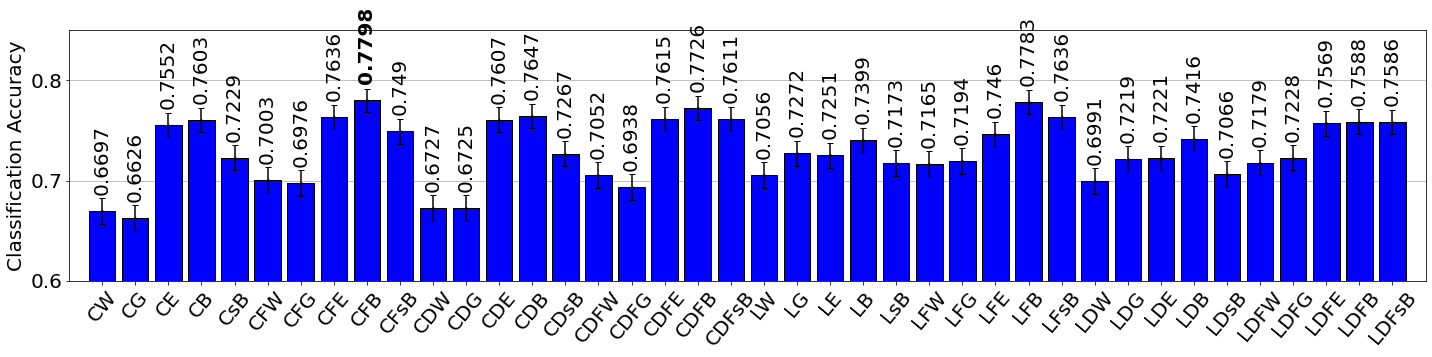

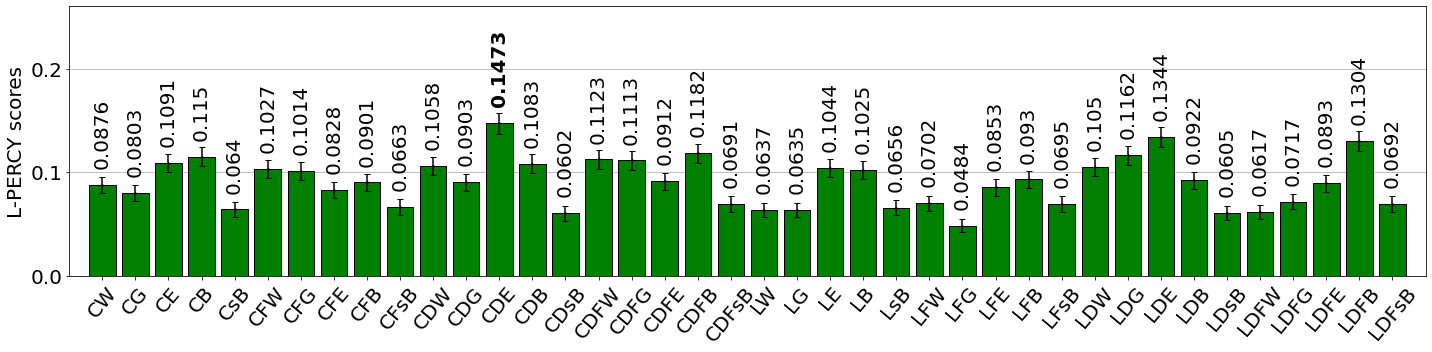

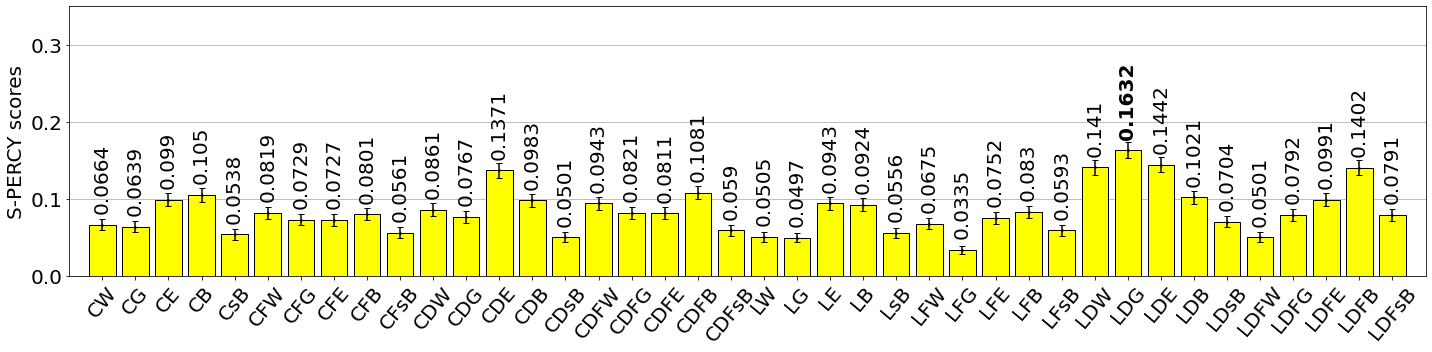

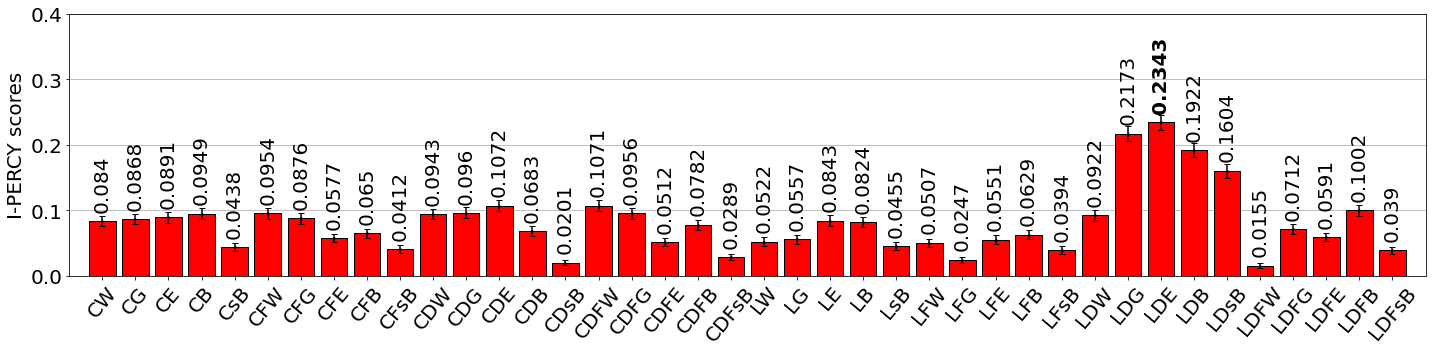

In [10]:
# Bar Plots
def plot_metric_bar_plots(metric, configurations, distributions, dataframe, FIZ_SIZE, display_fig=True):    

    fig_acc, ax = plt.subplots(figsize=FIZ_SIZE)
    ax.yaxis.grid(True)
    
    corr_distributions = []
    labels = []
    cnn_models_count = 0
    lstm_models_count = 0
    
    for config in configurations:
        try:
            base_model = config.split("-")[0]
            if base_model == "CNN":
                cnn_models_count += 1
            elif base_model == "LSTM":
                lstm_models_count += 1
            word_vectors = config.split("-")[1]
            fine_tuning = config.split("-")[2]
            dataset = config.split("-")[3]
            validation_method = config.split("-")[4]
            if "DISTILLATION" in list(config.split("-")):
                distillation = config.split("-")[5]
                distribution = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation][metric]
                corr_distributions.append(distribution)
                labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
            else:
                distillation = "NO_DIST"
                distribution = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][metric]
                corr_distributions.append(distribution)
                labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
        except:
            base_model = config.split("-")[0]
            if base_model == "CNN":
                cnn_models_count += 1
            elif base_model == "LSTM":
                lstm_models_count += 1
            word_vectors = config.split("-")[1]
            fine_tuning = config.split("-")[2]
            dataset = "SST2"
            validation_method = config.split("-")[3]
            if "DISTILLATION" in list(config.split("-")):
                distillation = config.split("-")[4]
                distribution = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation][metric]
                corr_distributions.append(distribution)
                labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
            else:
                distillation = "NO_DIST"
                distribution = distributions[base_model][word_vectors][fine_tuning][validation_method][metric]
                corr_distributions.append(distribution)
                labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
        
    correct_means = [round(getStats(x)[0], 4) for x in corr_distributions]
    correct_std = [getStats(x)[1] for x in corr_distributions]
    max_correct_mean = max(correct_means)
    index_max_correct_mean = correct_means.index(max_correct_mean)
    width = 0.8
    x_coordinates = [index for index, value in enumerate(labels)]
    
    if metric == "sent_acc":
        colors = iter(["blue"]*(cnn_models_count+lstm_models_count))
    elif metric == "ea_values_lime":
        colors = iter(["green"]*(cnn_models_count+lstm_models_count))
    elif metric == "ea_values_shap":
        colors = iter(["yellow"]*(cnn_models_count+lstm_models_count))
    elif metric == "ea_values_int_grad":
        colors = iter(["red"]*(cnn_models_count+lstm_models_count))
    for index, model in enumerate(labels):
        x_coordinate = x_coordinates[index]
        mean = correct_means[index]
        std_dev = correct_std[index]
        base_model = model.split("-")[0]
        word_vectors = model.split("-")[1]
        fine_tuning = model.split("-")[2]
        if fine_tuning == "NON_STATIC":
            fine_tuning = "FINE_TUNED"
        distillation = model.split("-")[3]
        color = next(colors)
        bars = ax.bar(x_coordinate, mean, width, yerr=std_dev, edgecolor = 'black', linewidth = 1, color=color)
        error_bars = ax.errorbar(x_coordinate, mean, yerr=std_dev, fmt='o', marker='.', capsize=3, capthick=1, markersize=3, elinewidth=0, color='black')
        for rect in bars:
            height = rect.get_height()
            if index == index_max_correct_mean:
                ax.text(x=rect.get_x() + rect.get_width() / 2, y=height+0.02, s="{}".format(height), ha='center', fontsize='20', rotation=90, weight='bold')
            else:
                ax.text(x=rect.get_x() + rect.get_width() / 2, y=height+0.02, s="{}".format(height), ha='center', fontsize='20', rotation=90)

#     ax.plot(correct_means, '-o', color='black', linewidth=3)
    if metric == "sent_acc":
        ax.set_ylabel('Classification Accuracy')
    elif metric == "ea_values_lime":
        ax.set_ylabel('L-PERCY scores')
    elif metric == "ea_values_shap":
        ax.set_ylabel('S-PERCY scores')
    elif metric == "ea_values_int_grad":
        ax.set_ylabel('I-PERCY scores')
    params = {'legend.fontsize': 25,
            'axes.labelsize': 15,
            'axes.titlesize': 15,
            'xtick.labelsize': 14,
            'ytick.labelsize': 14,
            'axes.titlepad': 12,
            'axes.axisbelow': True}
    ax.set_xticks(x_coordinates)
    labels_mod = list(dataframe["model"])
    ax.set_xticklabels(labels_mod, rotation=50, ha="center")
    ax.set_yticks([.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
    plt.rcParams.update(params)
    ax.set_xlim(-1, len(labels))
    if metric == "sent_acc":
        if dataset == "SST2":
            ax.set_ylim(0.6, 1.2)
        elif dataset == "SENTIMENT140":
            ax.set_ylim(0.6, 0.85)
    elif metric == "ea_values_lime":
        if dataset == "SST2":
            ax.set_ylim(0.0, 0.4)
        elif dataset == "SENTIMENT140":
            ax.set_ylim(0.0, 0.26)
    elif metric == "ea_values_shap":
        if dataset == "SST2":
            ax.set_ylim(0.0, 0.35)
        elif dataset == "SENTIMENT140":
            ax.set_ylim(0.0, 0.35)
    elif metric == "ea_values_int_grad":
        if dataset == "SST2":
            ax.set_ylim(0.0, 0.35)
        elif dataset == "SENTIMENT140":
            ax.set_ylim(0.0, 0.4)
    
    params = {'axes.labelsize': 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20}
    plt.rcParams.update(params)
    
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    if not os.path.exists("analysis/CL2022/"):
        os.makedirs("analysis/CL2022/")
    plt.savefig('analysis/CL2022/'+dataset.lower()+'_'+metric.lower()+'_accuracy.eps', bbox_inches = 'tight')
    if display_fig==False:
        plt.close(fig_acc)
    plt.show()

DISPLAY_FIG = True
plot_metric_bar_plots(metric="sent_acc", configurations=configurations, distributions=distributions, dataframe=df, FIZ_SIZE=(20, 5), display_fig=DISPLAY_FIG)
# plot_acc_bar_plots(metric="precision_dist", configurations, distributions, dataframe, (20, 5))
# plot_acc_bar_plots(metric="recall_dist", configurations, distributions, dataframe, (20, 5))
# plot_acc_bar_plots(metric="f1_score", configurations, distributions, dataframe, (20, 5))
plot_metric_bar_plots(metric="ea_values_lime", configurations=configurations, distributions=distributions, dataframe=df, FIZ_SIZE=(20, 5), display_fig=DISPLAY_FIG)
plot_metric_bar_plots(metric="ea_values_shap", configurations=configurations, distributions=distributions, dataframe=df, FIZ_SIZE=(20, 5), display_fig=DISPLAY_FIG)
plot_metric_bar_plots(metric="ea_values_int_grad", configurations=configurations, distributions=distributions, dataframe=df, FIZ_SIZE=(20, 5), display_fig=DISPLAY_FIG)

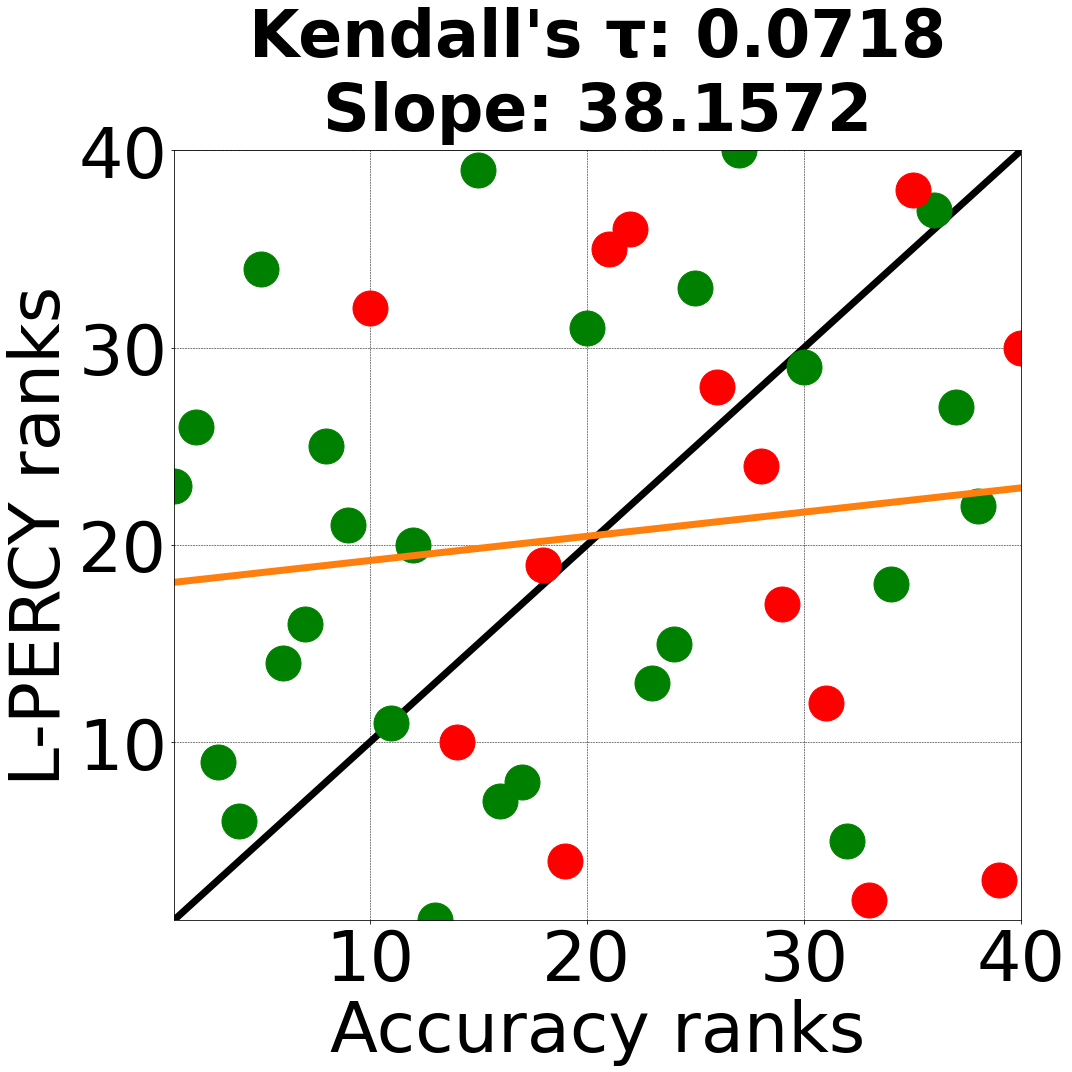

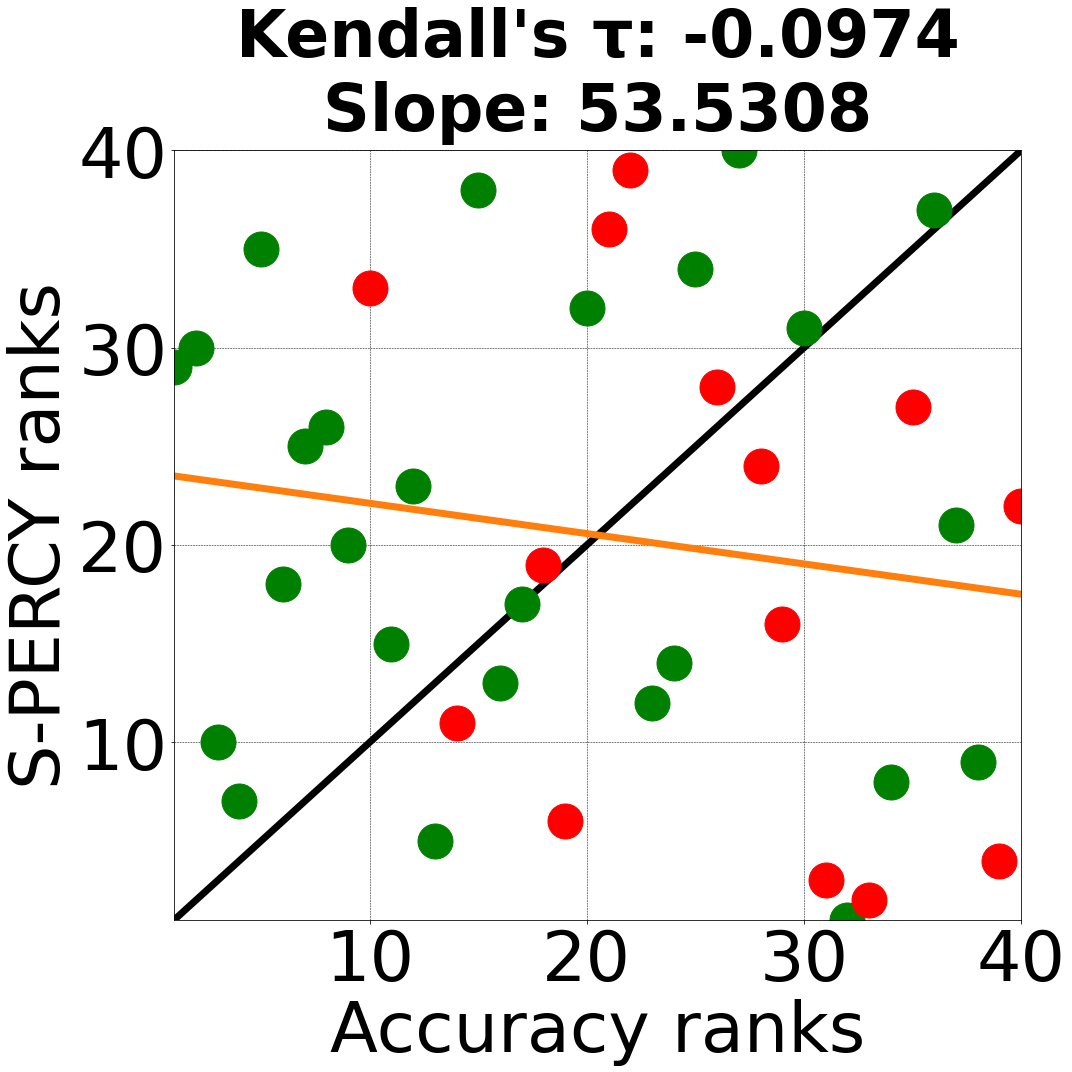

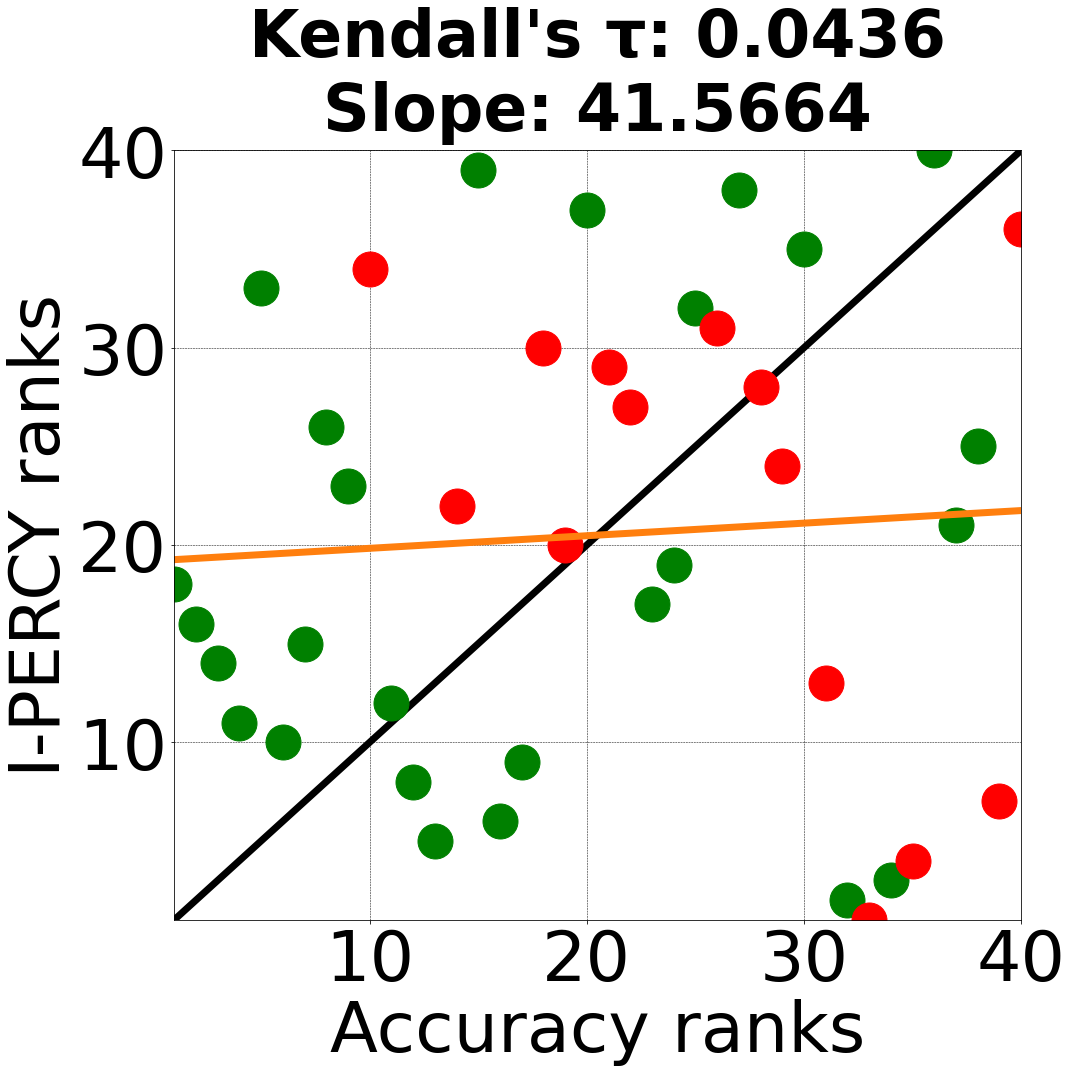

In [8]:
### Ranked correlation scatter plots ###
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

def plot_ranked_correlation_scatter_plots(performance_metric,
                                          performance_metric_values,
                                          percy_metric,
                                          percy_metric_values, 
                                          fig_size,
                                          display_fig=True):
    
    # Rank the values
    performance_metric_values_ranked = list(len(performance_metric_values)+1-rankdata(performance_metric_values, method='ordinal').astype(int))
    percy_metric_values_ranked = list(len(percy_metric_values)+1-rankdata(percy_metric_values, method='ordinal').astype(int))
    
    # Sort
    performance_metric_values_ranked_sorted = sorted(performance_metric_values_ranked)
    percy_metric_values_ranked_sorted = []
    for sorted_rank in performance_metric_values_ranked_sorted:
        index = performance_metric_values_ranked_sorted.index(sorted_rank)
        index_rank = percy_metric_values_ranked[index]
        percy_metric_values_ranked_sorted.append(index_rank)
    
    # Lrd and non-lrd
    performance_metric_values_ranked_sorted_lrd = []
    percy_metric_values_ranked_sorted_lrd = []
    performance_metric_values_ranked_sorted_non_lrd = []
    percy_metric_values_ranked_sorted_non_lrd = []
    for value_index, value in enumerate(performance_metric_values_ranked_sorted):
        index = performance_metric_values_ranked.index(value)
        global proposed_for_rule_dissemination
        PRD = proposed_for_rule_dissemination
        lrd = PRD[index]
        if lrd == 1:
            performance_metric_values_ranked_sorted_lrd.append(value)
            corr_percy_val = percy_metric_values_ranked_sorted[value_index] 
            percy_metric_values_ranked_sorted_lrd.append(corr_percy_val)
        elif lrd == 0:
            performance_metric_values_ranked_sorted_non_lrd.append(value)
            corr_percy_val = percy_metric_values_ranked_sorted[value_index] 
            percy_metric_values_ranked_sorted_non_lrd.append(corr_percy_val)
    
    fig, ax = plt.subplots(figsize=fig_size) # width, height
    plt.grid()

    def slope(x1, y1, x2, y2):
        m = (y2-y1)/(x2-x1)
        return m

    from math import atan
    def findAngle(M1, M2):
        PI = 3.14159265
        angle = abs((M2 - M1) / (1 + M1 * M2))
        ret = atan(angle)
        val = (ret * 180) / PI
        return round(val, 4)

    x = [val for val in range(1, 41)]
    y = [val for val in range(1, 41)]
    ax.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*np.array(x)+b, color="black", linewidth=7)
    ax.plot(performance_metric_values_ranked_sorted_lrd, percy_metric_values_ranked_sorted_lrd, 'o', markersize=35, color="green")
    ax.plot(performance_metric_values_ranked_sorted_non_lrd, percy_metric_values_ranked_sorted_non_lrd, 'o', markersize=35, color="red")
    m, b = np.polyfit(performance_metric_values_ranked_sorted, percy_metric_values_ranked_sorted, 1)
    points = m*np.array(performance_metric_values_ranked_sorted)+b
    ax.plot(performance_metric_values_ranked_sorted, points, linewidth=7)
    m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
    m2 = round(slope(performance_metric_values_ranked_sorted[0], points[0], performance_metric_values_ranked_sorted[1], points[1]), 2)
    angle = findAngle(m1, m2)
    ax.set_title("Kendall's τ: "+str(round(kendalltau(performance_metric_values_ranked_sorted, percy_metric_values_ranked_sorted)[0], 4))+"\n"
                 'Slope: '+str(angle), fontweight='bold')

    ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax.set_xlim(1, 40)
    ax.set_ylim(1, 40)
    
    ax.set_xlabel(performance_metric+" ranks")
    if percy_metric=="LIME":
        ax.set_ylabel("L-PERCY ranks")
    elif percy_metric=="SHAP":
        ax.set_ylabel("S-PERCY ranks")
    elif percy_metric=="INT-GRAD":
        ax.set_ylabel("I-PERCY ranks")

    params = {'figure.titlesize':40,
                'legend.fontsize': 30,
                'axes.labelsize': 70,
                'axes.titlesize': 65,
                'xtick.labelsize': 70,
                'ytick.labelsize': 70,
                'axes.titlepad': 20,
                'axes.axisbelow': True}
    plt.rcParams.update(params)
    # plt.subplots_adjust(wspace=1.0)
    plt.tight_layout()
    if not os.path.exists("analysis/CL2022/"):
        os.makedirs("analysis/CL2022/")
    plt.savefig('analysis/CL2022/'+dataset.lower()+'_'+performance_metric.lower()+'_vs_percy_'+percy_metric.lower()+'_ranked_corr_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
    if display_fig==False:
        plt.close(fig)
    plt.show()

# Sentiment Accuracy
DISPLAY_FIG=True
plot_ranked_correlation_scatter_plots("Accuracy",
                                      sentiment_accuracy,
                                      "LIME",
                                      percy_lime,
                                      (15, 15),
                                      DISPLAY_FIG)
plot_ranked_correlation_scatter_plots("Accuracy",
                                      sentiment_accuracy,
                                      "SHAP",
                                      percy_shap, 
                                      (15, 15),
                                      DISPLAY_FIG)
plot_ranked_correlation_scatter_plots("Accuracy",
                                      sentiment_accuracy,
                                      "INT-GRAD",
                                      percy_int_grad,
                                      (15, 15),
                                      DISPLAY_FIG)

# # Sentiment Precision
# plot_ranked_correlation_scatter_plots("Precision",
#                                       precisions,
#                                       "LIME",
#                                       percy_lime,
#                                       (15, 15),
#                                       DISPLAY_FIG)
# plot_ranked_correlation_scatter_plots("Precision",
#                                       precisions,
#                                       "SHAP",
#                                       percy_shap, 
#                                       (15, 15),
#                                       DISPLAY_FIG)
# plot_ranked_correlation_scatter_plots("Precision",
#                                       precisions,
#                                       "INT-GRAD",
#                                       percy_int_grad,
#                                       (15, 15),
#                                       DISPLAY_FIG)

# # Sentiment Recall
# plot_ranked_correlation_scatter_plots("Recall",
#                                       recalls,
#                                       "LIME",
#                                       percy_lime,
#                                       (15, 15),
#                                       DISPLAY_FIG)
# plot_ranked_correlation_scatter_plots("Recall",
#                                       recalls,
#                                       "SHAP",
#                                       percy_shap, 
#                                       (15, 15),
#                                       DISPLAY_FIG)
# plot_ranked_correlation_scatter_plots("Recall",
#                                       recalls,
#                                       "INT-GRAD",
#                                       percy_int_grad,
#                                       (15, 15),
#                                       DISPLAY_FIG)

# # Sentiment F1-scores
# plot_ranked_correlation_scatter_plots("F1-score",
#                                       f1_scores,
#                                       "LIME",
#                                       percy_lime,
#                                       (15, 15),
#                                       DISPLAY_FIG)
# plot_ranked_correlation_scatter_plots("F1-score",
#                                       f1_scores,
#                                       "SHAP",
#                                       percy_shap, 
#                                       (15, 15),
#                                       DISPLAY_FIG)
# plot_ranked_correlation_scatter_plots("F1-score",
#                                       f1_scores,
#                                       "INT-GRAD",
#                                       percy_int_grad,
#                                       (15, 15),
#                                       DISPLAY_FIG)

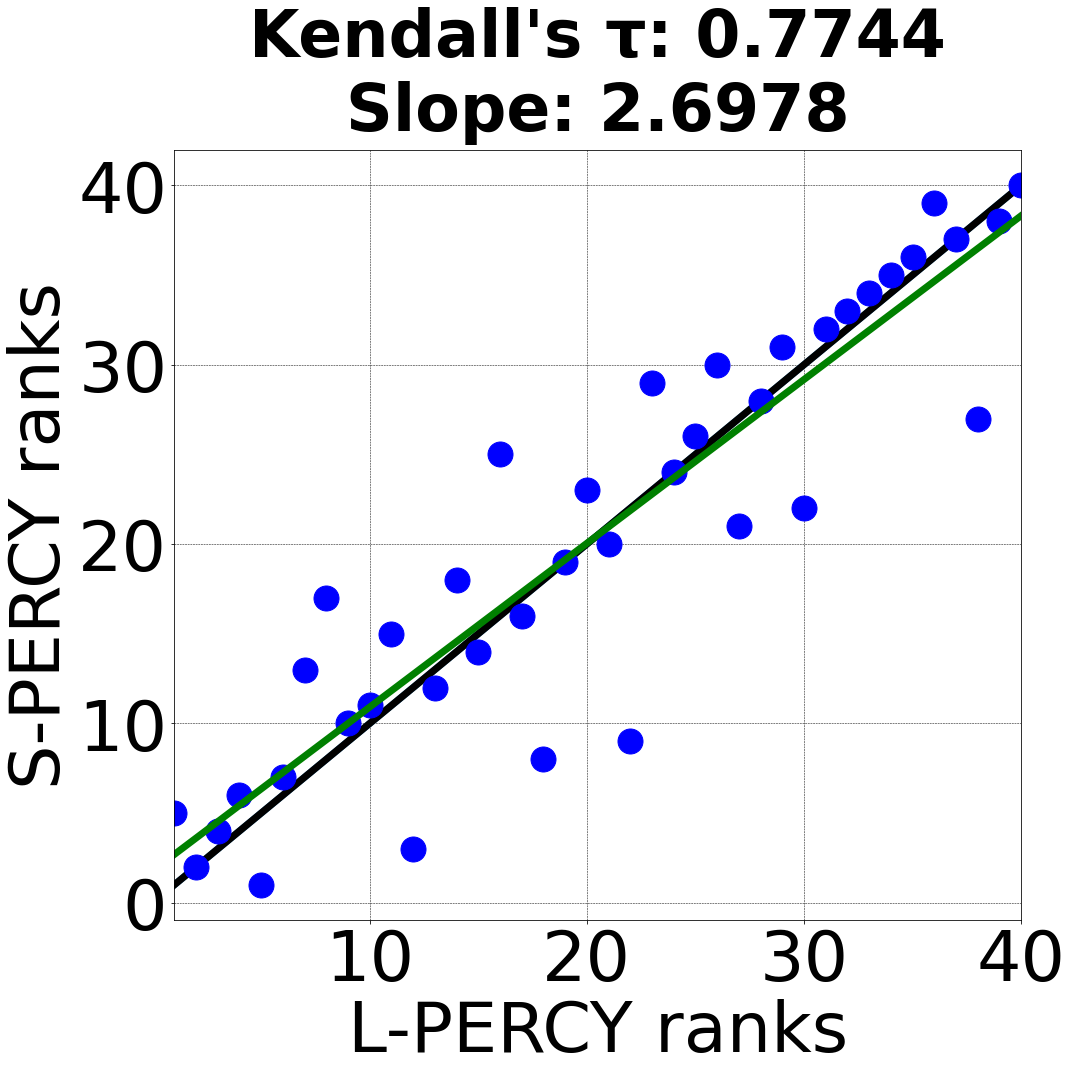

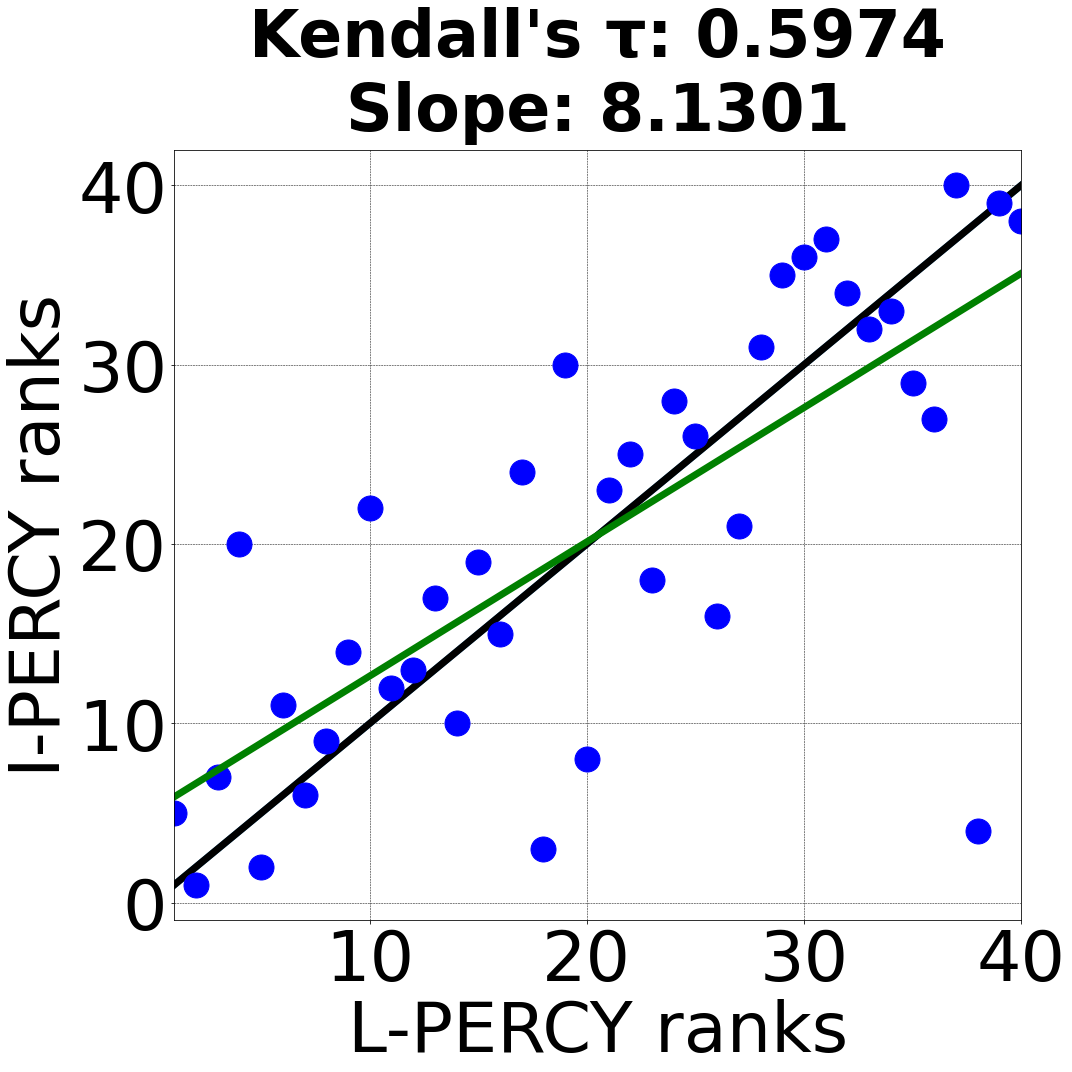

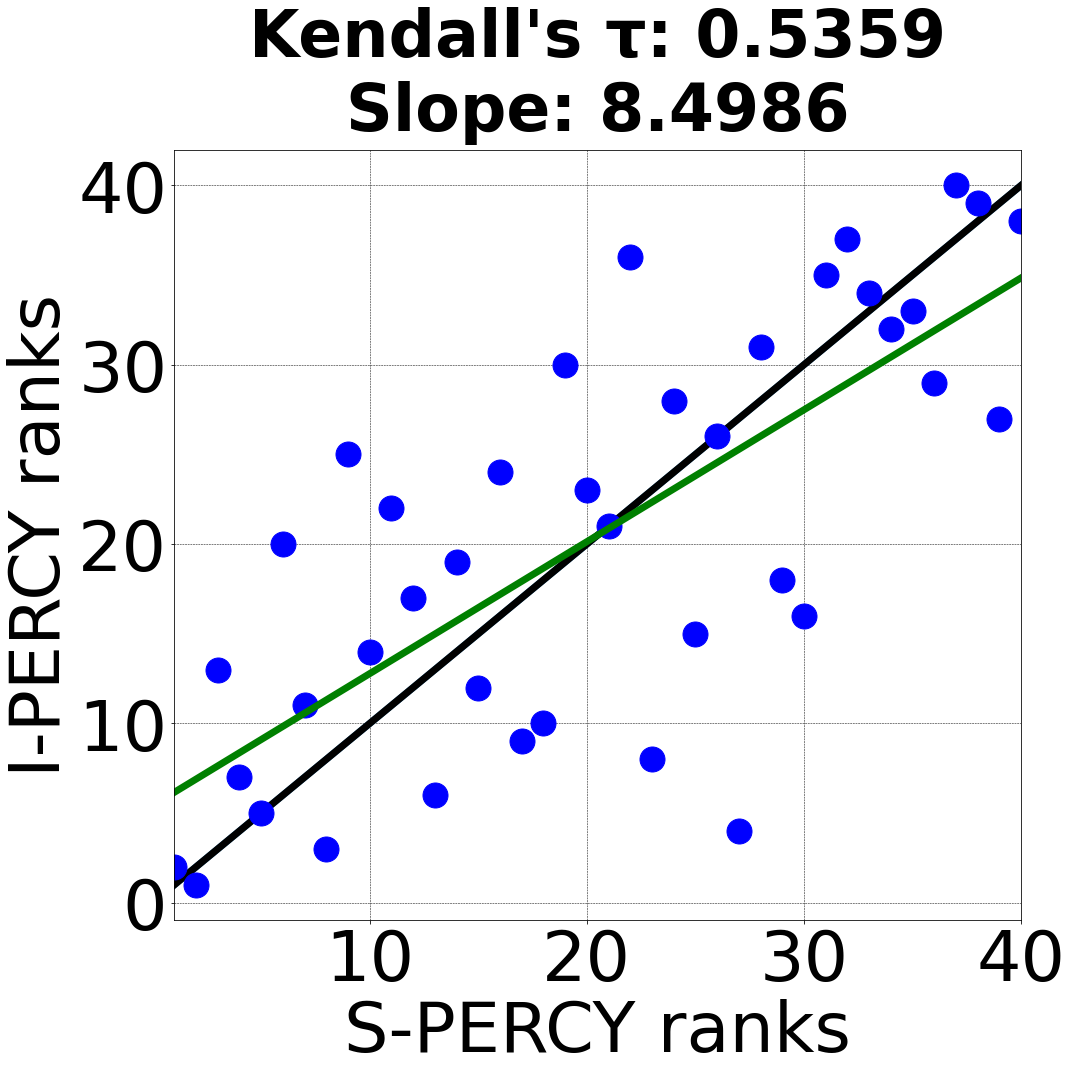

In [16]:
def plot_percy_scores_ranked_correlation_plots(framework_1, percy_scores_framework_1, framework_2, percy_scores_framework_2, fig_size, display_fig=True):
    
    percy_framework_1_ranks = list(len(percy_scores_framework_1)+1-rankdata(percy_scores_framework_1, method='ordinal').astype(int))
    percy_framework_2_ranks = list(len(percy_scores_framework_2)+1-rankdata(percy_scores_framework_2, method='ordinal').astype(int))
    
    percy_framework_1_ranks_sorted = sorted(percy_framework_1_ranks)
    percy_framework_2_ranks_sorted_as_per_framework_1 = []
    for sorted_rank in percy_framework_1_ranks_sorted:
        index_in_percy_framework_1_ranks = percy_framework_1_ranks.index(sorted_rank)
        framework_2_rank = percy_framework_2_ranks[index_in_percy_framework_1_ranks]
        percy_framework_2_ranks_sorted_as_per_framework_1.append(framework_2_rank)
    
    fig, ax = plt.subplots(figsize=fig_size)
    plt.grid()

    def slope(x1, y1, x2, y2):
        m = (y2-y1)/(x2-x1)
        return m

    from math import atan
    def findAngle(M1, M2):
        PI = 3.14159265
        angle = abs((M2 - M1) / (1 + M1 * M2))
        ret = atan(angle)
        val = (ret * 180) / PI
        return round(val, 4)

    x = [val for val in range(1, 41)]
    y = [val for val in range(1, 41)]
    ax.plot(x, y, linewidth=7)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*np.array(x)+b, color="black", linewidth=7)
    ax.plot(percy_framework_1_ranks_sorted, percy_framework_2_ranks_sorted_as_per_framework_1, 'o', markersize=25, color="blue")
    m, b = np.polyfit(percy_framework_1_ranks_sorted, percy_framework_2_ranks_sorted_as_per_framework_1, 1)
    points = m*np.array(percy_framework_1_ranks_sorted)+b
    ax.plot(percy_framework_1_ranks_sorted, points, linewidth=7, color="green")
    m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
    m2 = round(slope(percy_framework_1_ranks_sorted[0], points[0], percy_framework_1_ranks_sorted[1], points[1]), 2)
    angle = findAngle(m1, m2)
    ax.set_title("Kendall's τ: "+str(round(kendalltau(percy_framework_1_ranks_sorted, percy_framework_2_ranks_sorted_as_per_framework_1)[0], 4))+"\n"
                 'Slope: '+str(angle), fontweight='bold')

    # fig.suptitle(dataset, weight="bold", x=0.51, y=1.1)

    ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax.set_xlim(1, 40)
    
    if framework_1 == "LIME" and framework_2 == "SHAP":
        ax.set_xlabel("L-PERCY ranks")
        ax.set_ylabel("S-PERCY ranks")
    elif framework_1 == "LIME" and framework_2 == "INT-GRAD":
        ax.set_xlabel("L-PERCY ranks")
        ax.set_ylabel("I-PERCY ranks")
    elif framework_1 == "SHAP" and framework_2 == "INT-GRAD":
        ax.set_xlabel("S-PERCY ranks")
        ax.set_ylabel("I-PERCY ranks")

    params = {'figure.titlesize':40,
                'legend.fontsize': 30,
                'axes.labelsize': 70,
                'axes.titlesize': 65,
                'xtick.labelsize': 70,
                'ytick.labelsize': 70,
                'axes.titlepad': 20,
                'axes.axisbelow': True}
    plt.rcParams.update(params)
    plt.tight_layout()
    if not os.path.exists("analysis/CL2022/"):
        os.makedirs("analysis/CL2022/")
    plt.savefig('analysis/CL2022/'+dataset.lower()+'_'+framework_1.lower()+'_vs_'+framework_2.lower()+'_percy_scores_scatter_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
    if display_fig==False:
        plt.close(fig)
    plt.show()

DISPLAY_FIG = True    
plot_percy_scores_ranked_correlation_plots("LIME", percy_lime, "SHAP", percy_shap, (15, 15), display_fig=DISPLAY_FIG)
plot_percy_scores_ranked_correlation_plots("LIME", percy_lime, "INT-GRAD", percy_int_grad, (15, 15), display_fig=DISPLAY_FIG)
plot_percy_scores_ranked_correlation_plots("SHAP", percy_shap, "INT-GRAD", percy_int_grad, (15, 15), display_fig=DISPLAY_FIG)

In [10]:
# def plot_pearson_corr_bar_plots(configurations, distributions, FIZ_SIZE, metric):    

#     fig_acc, ax = plt.subplots(figsize=FIZ_SIZE)
#     ax.yaxis.grid(True)
    
#     pearson_corr_distributions = []
#     labels = []
    
#     if metric == "lime_shap_pearson":
#         metric_val = "lime_shap_consistency_values"
#     elif metric=="shap_int_grad_pearson":
#         metric_val = "shap_int_grad_consistency_values"
#     elif metric=="lime_int_grad_pearson":
#         metric_val = "lime_int_grad_consistency_values"
    
#     for config in configurations:
#         try:
#             base_model = config.split("-")[0]
#             word_vectors = config.split("-")[1]
#             fine_tuning = config.split("-")[2]
#             dataset = config.split("-")[3]
#             validation_method = config.split("-")[4]
#             if "DISTILLATION" in list(config.split("-")):
#                 distillation = config.split("-")[5]
#                 distribution = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation][metric_val]
#                 pearson_corr_distributions.append(distribution)
#                 labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
#             else:
#                 distillation = "NO_DIST"
#                 distribution = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][metric_val]
#                 pearson_corr_distributions.append(distribution)
#                 labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
#         except:
#             base_model = config.split("-")[0]
#             word_vectors = config.split("-")[1]
#             fine_tuning = config.split("-")[2]
#             dataset = "SST2"
#             validation_method = config.split("-")[3]
#             if "DISTILLATION" in list(config.split("-")):
#                 distillation = config.split("-")[4]
#                 distribution = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation][metric_val]
#                 pearson_corr_distributions.append(distribution)
#                 labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
#             else:
#                 distillation = "NO_DIST"
#                 distribution = distributions[base_model][word_vectors][fine_tuning][validation_method][metric_val]
#                 pearson_corr_distributions.append(distribution)
#                 labels.append(base_model+"-"+word_vectors+"-"+fine_tuning+"-"+distillation)
        
#     correct_means = [round(getStats(x)[0], 4) for x in pearson_corr_distributions]
#     correct_std = [getStats(x)[1] for x in pearson_corr_distributions]
#     width = 0.8
#     x_coordinates = [index for index, value in enumerate(labels)]
#     cnn_colors = iter(cm.winter(np.linspace(0, 1, int(len(labels)/2))))
#     lstm_colors = iter(cm.autumn(np.linspace(0, 1, int(len(labels)/2))))
#     for index, model in enumerate(labels):
#         x_coordinate = x_coordinates[index]
#         mean = correct_means[index]
#         std_dev = correct_std[index]
#         base_model = model.split("-")[0]
#         word_vectors = model.split("-")[1]
#         fine_tuning = model.split("-")[2]
#         if fine_tuning == "NON_STATIC":
#             fine_tuning = "FINE_TUNED"
#         distillation = model.split("-")[3]
#         if base_model == "CNN":
#             color = next(cnn_colors)
#         elif base_model == "LSTM":
#             color = next(lstm_colors)
#         bars = ax.bar(x_coordinate, mean, width, yerr=std_dev, edgecolor = 'black', linewidth = 1, color=color)
#         error_bars = ax.errorbar(x_coordinate, mean, yerr=std_dev, fmt='o', marker='.', capsize=3, capthick=1, markersize=3, elinewidth=0, color='black')
#         for rect in bars:
#             height = rect.get_height()
#             ax.text(x=rect.get_x() + rect.get_width() / 2, y=height+0.02, s="{}".format(height), ha='center', fontsize='x-large', rotation='vertical')
    
#     if metric == "lime_shap_pearson":
#         ax.set_ylabel('LIME and SHAP pearson corr.')
#     elif metric == "shap_int_grad_pearson":
#         ax.set_ylabel('SHAP and Integrated Grad. pearson corr.')
#     elif metric == "lime_int_grad_pearson":
#         ax.set_ylabel('LIME and Integrated Grad. pearson corr.')
#     params = {'legend.fontsize': 25,
#             'axes.labelsize': 15,
#             'axes.titlesize': 15,
#             'xtick.labelsize': 14,
#             'ytick.labelsize': 14,
#             'axes.titlepad': 12,
#             'axes.axisbelow': True}
#     ax.set_xticks(x_coordinates)
#     labels_mod = []
#     for index, val in enumerate(labels):
#         base_model = val.split("-")[0]
#         word_vectors = val.split("-")[1]
#         fine_tuning = val.split("-")[2]
#         if fine_tuning == "NON_STATIC":
#             fine_tuning = "FINE_TUNED"
#         distillation = val.split("-")[3]
#         lab = base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0]
#         labels_mod.append(lab)
#     ax.set_xticklabels(labels_mod, rotation='vertical')
#     ax.set_yticks([.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
#     plt.rcParams.update(params)
#     ax.set_xlim(-1, 32)
#     if metric == "lime_shap_pearson":
#         if dataset == "SST2":
#             ax.set_ylim(0.0, 1.0)
#         elif dataset == "SENTIMENT140":
#             ax.set_ylim(0.0, 1.0)
#     elif metric == "shap_int_grad_pearson":
#         if dataset == "SST2":
#             ax.set_ylim(0.0, 1.0)
#         elif dataset == "SENTIMENT140":
#             ax.set_ylim(0.0, 1.0)
#     elif metric == "lime_int_grad_pearson":
#         if dataset == "SST2":
#             ax.set_ylim(0.0, 1.0)
#         elif dataset == "SENTIMENT140":
#             ax.set_ylim(0.0, 1.0)
#     plt.tight_layout()
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
#     plt.savefig('analysis/CompLing_results/'+dataset+'_'+metric+'_accuracy.eps', bbox_inches = 'tight')
#     plt.show()

# FIZ_SIZE = (15, 5)
# plot_pearson_corr_bar_plots(configurations, distributions, FIZ_SIZE, metric="lime_shap_pearson")
# plot_pearson_corr_bar_plots(configurations, distributions, FIZ_SIZE, metric="shap_int_grad_pearson")
# plot_pearson_corr_bar_plots(configurations, distributions, FIZ_SIZE, metric="lime_int_grad_pearson")

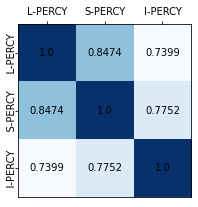

In [18]:
# Pearson corr. heatmap
lime_shap = np.corrcoef(percy_lime_dist_pearson, percy_shap_dist_pearson)[0][1]
lime_int_grad = np.corrcoef(percy_lime_dist_pearson, percy_int_grad_dist_pearson)[0][1]

shap_lime = np.corrcoef(percy_shap_dist_pearson, percy_lime_dist_pearson)[0][1]
shap_int_grad = np.corrcoef(percy_shap_dist_pearson, percy_int_grad_dist_pearson)[0][1]

int_grad_shap = np.corrcoef(percy_shap_dist_pearson, percy_int_grad_dist_pearson)[0][1]
int_grad_lime = np.corrcoef(percy_int_grad_dist_pearson, percy_lime_dist_pearson)[0][1]

labels = ["L-PERCY", "S-PERCY", "I-PERCY"]
ylabels = ["    L-PERCY    ", "    S-PERCY    ", "    I-PERCY    "]
values = np.array([[1, lime_shap, lime_int_grad],
                   [shap_lime, 1, shap_int_grad],
                   [int_grad_lime, int_grad_shap, 1]])

fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(values, cmap=cm.Blues)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.xaxis.tick_top()
# ax.xaxis.set_label_position('top') 
ax.set_yticks(np.arange(len(ylabels)))
ax.set_yticklabels(ylabels)

# # # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")

FONT_SIZE = 10

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(values[i, j], 4), ha="center", va="center", color="black", fontsize=FONT_SIZE)

params = {'figure.titlesize':15,
            'legend.fontsize': 15,
            'axes.labelsize': 15,
            'axes.titlesize': 15,
            'xtick.labelsize': FONT_SIZE,
            'ytick.labelsize': FONT_SIZE,
            'axes.titlepad': 10}
plt.rcParams.update(params)
fig.tight_layout()
if not os.path.exists("analysis/CL2022/"):
    os.makedirs("analysis/CL2022/")
plt.savefig('analysis/CL2022/'+dataset.lower()+'_pearson_corr_heatmaps.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.show()

In [ ]:
# Plot Lipschitz scores
def plot_lipschitz_box_plots(configurations, distributions, FIZ_SIZE, y_limits):

    fig, ax = plt.subplots(figsize=FIZ_SIZE)
    plt.grid()
    width = 0.6

    lip_values = []
    datasets = []
    frameworks = []

    for config in configurations:
        try:
            base_model = config.split("-")[0]
            word_vectors = config.split("-")[1]
            fine_tuning = config.split("-")[2]
            dataset = config.split("-")[3]
            validation_method = config.split("-")[4]
            if "DISTILLATION" in list(config.split("-")):
                distillation = config.split("-")[5]

            # LIME values
            try:
                lime_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["lime_lipschitz_values"]
                for lip_val in lime_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("LIME")
            except:
                lime_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["lime_lipschitz_values"]
                for lip_val in lime_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("LIME")
            
            # SHAP values
            try:
                shap_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["shap_lipschitz_values"]
                for lip_val in shap_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("SHAP")
            except:
                shap_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["shap_lipschitz_values"]
                for lip_val in shap_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("SHAP")
            
            # INT-GRAD values
            try:
                int_grad_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["int_grad_lipschitz_values"]
                for lip_val in int_grad_lip_values_dist:
                    lip_val = lip_val + 0.00006
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("INT-GRAD")
            except:
                int_grad_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["int_grad_lipschitz_values"]
                for lip_val in int_grad_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("INT-GRAD")
        
        except:
            base_model = config.split("-")[0]
            word_vectors = config.split("-")[1]
            fine_tuning = config.split("-")[2]
            dataset = "SST2"
            validation_method = config.split("-")[3]
            if "DISTILLATION" in list(config.split("-")):
                distillation = config.split("-")[4]

            # LIME values
            try:
                lime_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][validation_method]["lime_lipschitz_values"]
                for lip_val in lime_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("LIME")
            except:
                lime_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["lime_lipschitz_values"]
                for lip_val in lime_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("LIME")
            
            # SHAP values
            try:
                shap_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][validation_method]["shap_lipschitz_values"]
                for lip_val in shap_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("SHAP")
            except:
                shap_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["shap_lipschitz_values"]
                for lip_val in shap_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("SHAP")
            
            # INT-GRAD values
            try:
                int_grad_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][validation_method]["int_grad_lipschitz_values"]
                for lip_val in int_grad_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("INT-GRAD")
            except:
                int_grad_lip_values_dist = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["int_grad_lipschitz_values"]
                for lip_val in int_grad_lip_values_dist:
                    lip_values.append(lip_val)
                    datasets.append(dataset)
                    frameworks.append("INT-GRAD")
    
    data = {"Lipschitz scores":lip_values,
            "Datasets":datasets,
            "Frameworks":frameworks}
    dataframe = pd.DataFrame(data)
    
    sns.set_theme(style="ticks", palette="pastel")
    sns.boxplot(y="Lipschitz scores", x="Datasets", hue="Frameworks", data=dataframe, linewidth=3.0)
    ax.set_xlabel("")
    ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax.set_ylim(y_limits[0], y_limits[1])

    params = {'legend.fontsize': 30,
            'axes.labelsize': 35,
            'axes.titlesize': 30,
            'xtick.labelsize': 30,
            'ytick.labelsize': 30,
            'axes.titlepad': 12,
            'axes.axisbelow': True}
    plt.rcParams.update(params)
    
    legends = ["LIME", "SHAP", "INT-GRAD"]
    leg = ax.legend(legends, loc='upper center', bbox_to_anchor=(0.5, 1.0))
    for index, legobj in enumerate(leg.legendHandles):
        legobj.set_linewidth(15.0)
        legobj.set_color(sns.color_palette("pastel")[index])

    plt.savefig('analysis/CL2022/lipschitz_box_plots.eps', bbox_inches = 'tight')
    if not os.path.exists("analysis/CL2022/"):
        os.makedirs("analysis/CL2022/")
    fig.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    plt.show()

FIZ_SIZE = (25, 8)
y_limits = (0.0, 0.00125)
dataframe = plot_lipschitz_box_plots(configurations, distributions, FIZ_SIZE, y_limits)

In [15]:
# Create anecdotal examples heatmap
def sentence_heatmap(tokenized_sentence, weights):
    """
    Given the input of tokenized_sentence and weights, generate the latex code for heatmap as
    
    \colorbox{red!20}{lots} of \colorbox{red!30}{effort} \colorbox{red!10}{and} \colorbox{red!50}{intelligence} 
    are on \colorbox{red!40}{display} \textcolor{blue}{\textbf{but}} 
    in \colorbox{red!70}{execution} it is all \colorbox{red!90}{awkward}, 
    \colorbox{red!80}{static} , and \colorbox{red!100}{lifeless} \colorbox{red!60}{rumblings}.
    """
    
    latex_string = ""
    min_weight = min(weights)
    max_weight = max(weights)
    non_zero_digit_index = [index for index, val in enumerate(str(min_weight)) if val!="0" and val!="."][0]-1
    weight_multiplier = 10**(non_zero_digit_index)
    for index, feature in enumerate(tokenized_sentence):
        weight = weights[index]
        weight = weight*weight_multiplier
        weight = round(weight)
        weight = str(weight)
        if index != (len(tokenized_sentence)-1):
            latex_token = "\colorbox{red!"+weight+"}{"+feature+"}" + " "
        else:
            latex_token = "\colorbox{red!"+weight+"}{"+feature+"}"
        latex_string = latex_string + latex_token
    latex_string = latex_string + "."
    return latex_string

tokenized_sentence = ['it', "'s", 'hard', 'to', 'imagine', 'anyone', 'managing', 'to', 'steal', 'a', 
                      'movie', 'not', 'only', 'from', 'charismatic', 'rising', 'star', 'jake', 'gyllenhaal', 
                      'but', 'also', 'from', 'accomplished', 'oscar', 'winners', 'susan', 'sarandon', ',', 
                      'dustin', 'hoffman', 'and', 'holly', 'hunter', ',', 'yet', 'newcomer', 'ellen', 'pompeo', 
                      'pulls', 'off', 'the', 'feat', 'with', 'aplomb']
weights = [0.0004749879923038279, 0.0015239519319791921, 0.018236839269846417, 0.008360939818964398, 
           0.03988666219959337, 0.024069137344235627, 0.027048573441670862, 0.008360939818964398, 
           0.012722118670745842, 0.004818339958565655, 0.009121225326758556, 0.011736447032529298, 
           0.0035654211895340174, 0.005491158866974916, 0.05573209852224024, 0.0018156235267158772, 
           0.029825168327735817, 0.00710428355841432, 0.010127965784720572, 0.004086283840125463, 
           0.0005258024115408371, 0.005491158866974916, 0.079461774340666, 0.06439471061745763, 
           0.06454088635081441, 0.02296448526386789, 0.006301279811666353, 0.011888425807471665, 
           0.002596893472594798, 0.004487928704883473, 0.022604215524131572, 0.008341757154434002, 
           0.00924149497678668, 0.011888425807471665, 0.006742119776018541, 0.020097389273637238, 
           0.0008382219781938538, 0.04154635246887202, 0.07596237095411028, 0.023894258433056592, 
           0.0034819377825532284, 0.10746466523580078, 0.0159230158362697, 0.10969229547379142]
# min_weight = min(weights)
# max_weight = max(weights)
# non_zero_digit_index = [index for index, val in enumerate(str(min_weight)) if val!="0" and val!="."][0]-1
# weight_multiplier = 10**(non_zero_digit_index)
# weight = min_weight*weight_multiplier
# weight = round(weight)
# print(weight)
ex1 = sentence_heatmap(tokenized_sentence, weights)
print(ex1)

\colorbox{red!5}{it} \colorbox{red!15}{'s} \colorbox{red!182}{hard} \colorbox{red!84}{to} \colorbox{red!399}{imagine} \colorbox{red!241}{anyone} \colorbox{red!270}{managing} \colorbox{red!84}{to} \colorbox{red!127}{steal} \colorbox{red!48}{a} \colorbox{red!91}{movie} \colorbox{red!117}{not} \colorbox{red!36}{only} \colorbox{red!55}{from} \colorbox{red!557}{charismatic} \colorbox{red!18}{rising} \colorbox{red!298}{star} \colorbox{red!71}{jake} \colorbox{red!101}{gyllenhaal} \colorbox{red!41}{but} \colorbox{red!5}{also} \colorbox{red!55}{from} \colorbox{red!795}{accomplished} \colorbox{red!644}{oscar} \colorbox{red!645}{winners} \colorbox{red!230}{susan} \colorbox{red!63}{sarandon} \colorbox{red!119}{,} \colorbox{red!26}{dustin} \colorbox{red!45}{hoffman} \colorbox{red!226}{and} \colorbox{red!83}{holly} \colorbox{red!92}{hunter} \colorbox{red!119}{,} \colorbox{red!67}{yet} \colorbox{red!201}{newcomer} \colorbox{red!8}{ellen} \colorbox{red!415}{pompeo} \colorbox{red!760}{pulls} \colorbox{

### END ###

In [ ]:
data = {}
for config in configurations:
    base_model = config.split("-")[0]
    word_vectors = config.split("-")[1]
    fine_tuning = config.split("-")[2]
    dataset = config.split("-")[3]
    validation_method = config.split("-")[4]
    if "DISTILLATION" in list(config.split("-")):
        distillation = config.split("-")[5]
        score = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime"]
        data[config] = score
    else:
        score = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime"]
        data[config] = score

In [ ]:
scores = []
for config in configurations:
    base_model = config.split("-")[0]
    word_vectors = config.split("-")[1]
    fine_tuning = config.split("-")[2]
    dataset = config.split("-")[3]
    validation_method = config.split("-")[4]
    if "DISTILLATION" in list(config.split("-")):
        distillation = config.split("-")[5]
        score = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime"]
        scores = scores + score
    else:
        score = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime"]
        scores = scores + score

In [73]:
models = []

a_scores_lime = []
a_scores_shap = []
a_scores_int_grad = []

b_scores_lime = []
b_scores_shap = []
b_scores_int_grad = []

lime_diff_scores = []
shap_diff_scores = []
int_grad_diff_scores = []

for index, config in enumerate(configurations):
    try:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = config.split("-")[3]
        validation_method = config.split("-")[4]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[5]
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["b_scores_int_grad"]
            
            models = models + [config]*len(a_score_lime)
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))
            
        else:
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["b_scores_int_grad"]
            
            models = models + [config]*len(a_score_lime)
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))
                
    except:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        validation_method = config.split("-")[3]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[4]
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["b_scores_int_grad"]
            
            models = models + [config]*len(a_score_lime)
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))
            
        else:
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method]["b_scores_int_grad"]
            
            models = models + [config]*len(a_score_lime)
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))

In [118]:
data = {"models":models,
       "A scores":a_scores_lime,
       "B scores":b_scores_lime}
dataframe = pd.DataFrame(data)

lime_diff_scores_copy = lime_diff_scores.copy()
lime_diff_scores_copy = sorted(lime_diff_scores_copy, reverse=True)
lime_diff_scores_top_2 = lime_diff_scores_copy[:2]
lime_diff_scores_bottom_2 = lime_diff_scores_copy[-2:]
configs_indices_top_2 = [lime_diff_scores.index(value) for value in lime_diff_scores_top_2]
configs_indices_bottom_2 = [lime_diff_scores.index(value) for value in lime_diff_scores_bottom_2]
configs_names_top_2 = [configurations[index] for index in configs_indices_top_2]
configs_names_bottom_2 = [configurations[index] for index in configs_indices_bottom_2]

dataframe_top_2 = pd.DataFrame()
for name in configs_names_top_2:
    select_dataframe = dataframe.loc[(dataframe["models"]==name)]
    dataframe_top_2 = dataframe_top_2.append(select_dataframe)

dataframe_bottom_2 = pd.DataFrame()
for name in configs_names_bottom_2:
    select_dataframe = dataframe.loc[(dataframe["models"]==name)]
    dataframe_bottom_2 = dataframe_bottom_2.append(select_dataframe)

updated_dataframe = pd.concat([dataframe_top_2, dataframe_bottom_2], axis=0)

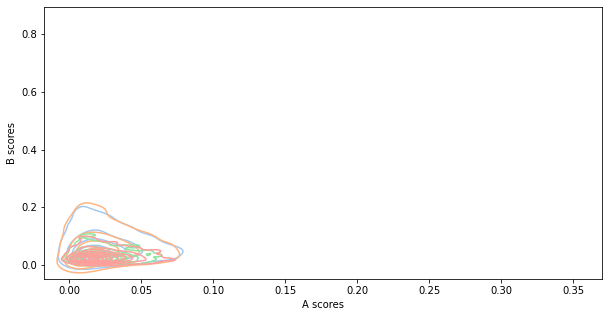

In [126]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.set_theme(style="ticks", palette="pastel")
sns.kdeplot(data=updated_dataframe, x="A scores", y="B scores", hue="models", kind="kde", legend = False)
plt.show()

In [67]:
configs_names

['LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION',
 'CNN-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION']

In [71]:
True in list(dataframe_top_2.duplicated())

False

In [81]:
configs_names_bottom_2

['CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION',
 'CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING']

In [85]:
ddlime_diff_scores_bottom_2

[0.007476858185117528, 0.005392797742373029]

In [89]:
updated_dataframe

,models,a_scores,b_scores
107388,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.005882,0.038848
107389,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.037964,0.021463
107390,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.033594,0.064549
107391,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.011624,0.053458
107392,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.147551,0.054475
...,...,...,...
6353,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.036460,0.028599
6354,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.055228,0.034609
6355,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.032157,0.045313
6356,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.037574,0.028616


In [101]:
updated_dataframe

,models,a_scores,b_scores
107388,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.005882,0.038848
107389,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.037964,0.021463
107390,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.033594,0.064549
107391,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.011624,0.053458
107392,LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPI...,0.147551,0.054475
...,...,...,...
6353,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.036460,0.028599
6354,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.055228,0.034609
6355,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.032157,0.045313
6356,CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING,0.037574,0.028616


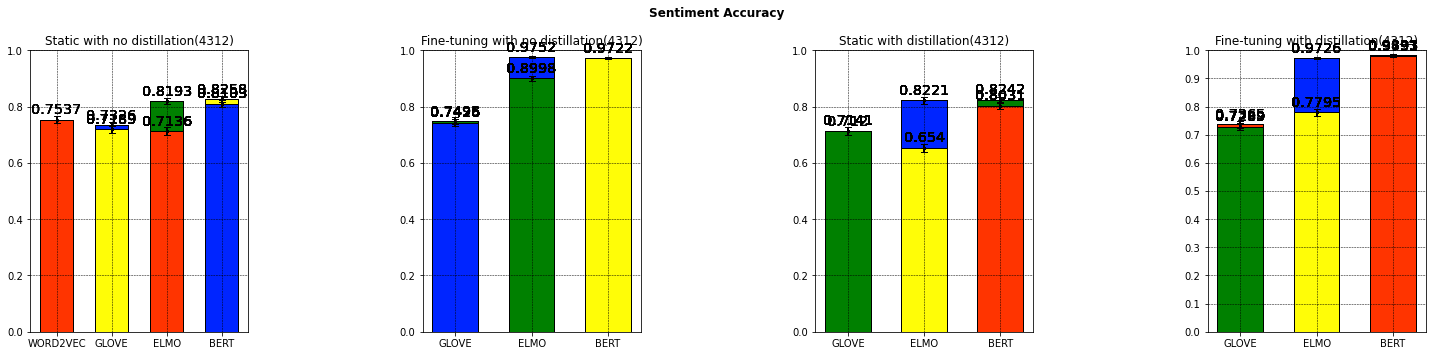

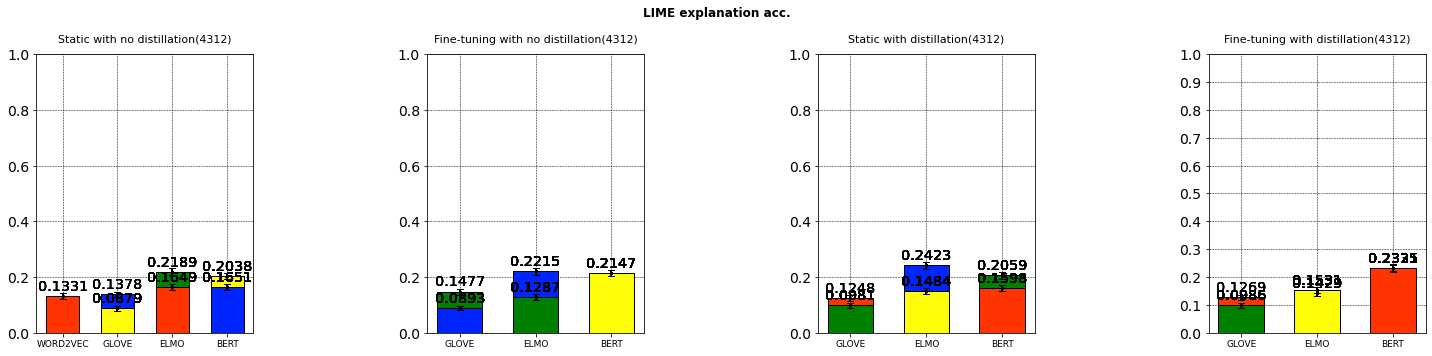

In [9]:
FIZ_SIZE = (20, 5)

#### Plots ####
plot_sent_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_acc_bar_plots(configurations, distributions, FIZ_SIZE)
# plot_shap_acc_bar_plots(configurations, distributions, FIZ_SIZE)
# plot_int_grad_acc_bar_plots(configurations, distributions, FIZ_SIZE)

# #### Pearson Corr. matrix ####
# plot_lime_shap_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
# plot_lime_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
# plot_shap_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)

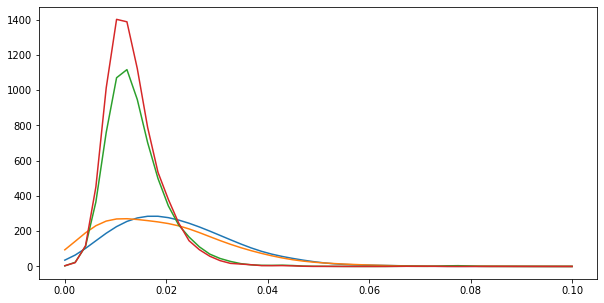

In [115]:
# from scipy.stats import gaussian_kde
# fig, ax = plt.subplots(figsize=(10, 5))

# labels = list(set(updated_dataframe["models"]))
# densities = []
# for label in labels:
#     df = updated_dataframe.loc[updated_dataframe["models"]==label]
#     a_scores = list(df["a_scores"])
#     b_scores = list(df["b_scores"])
#     array = np.array([a_scores, b_scores])
#     density = gaussian_kde(array)
#     xs = np.linspace(0, 0.1)
#     ys = np.linspace(0, 0.2)
#     ticks = np.array([xs, ys])
#     ax.plot(xs, density(ticks))
# plt.show()

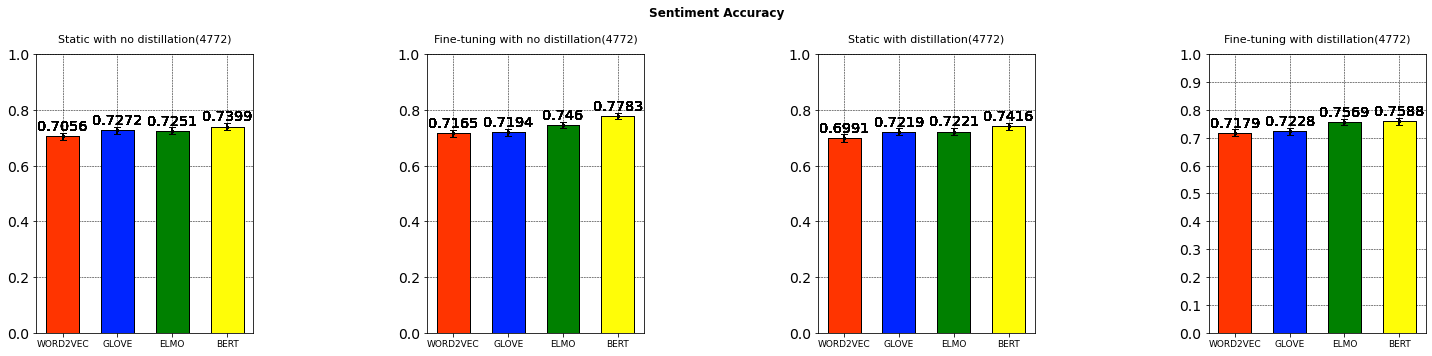

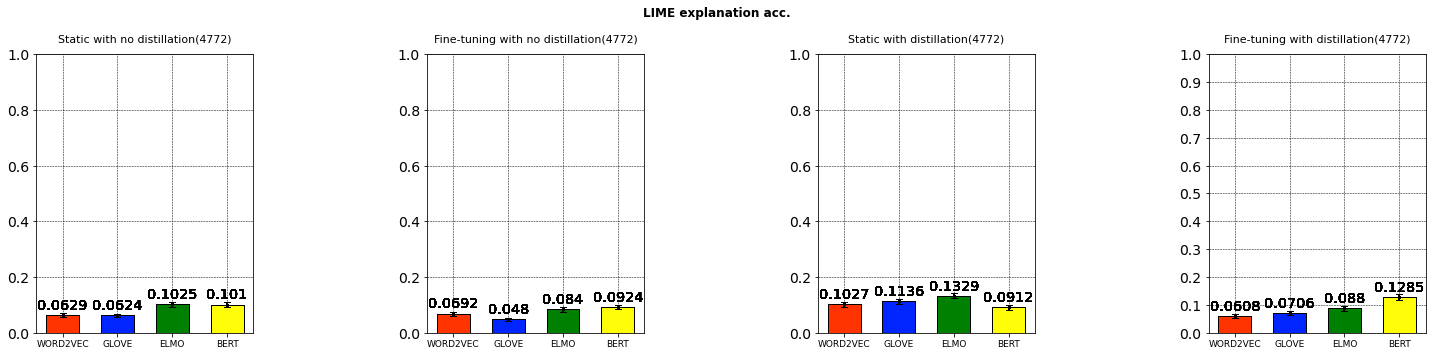

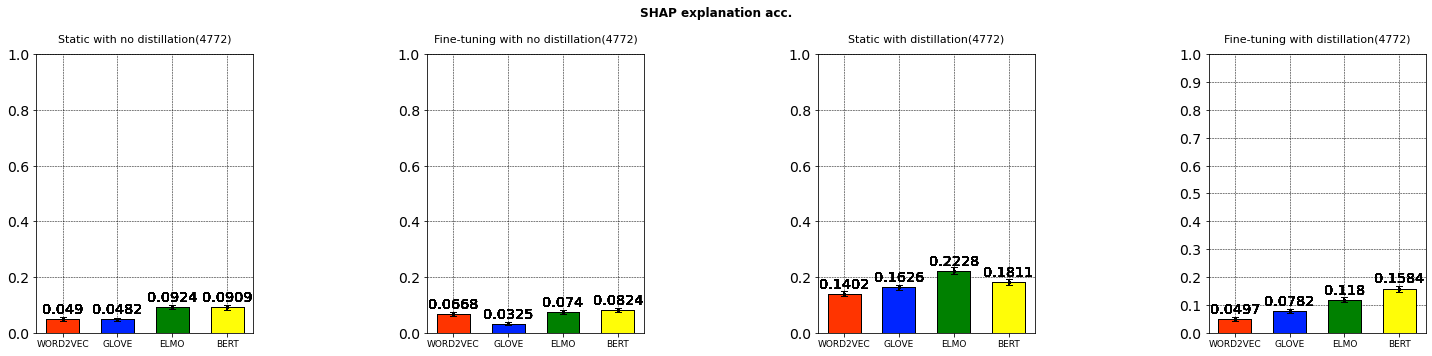

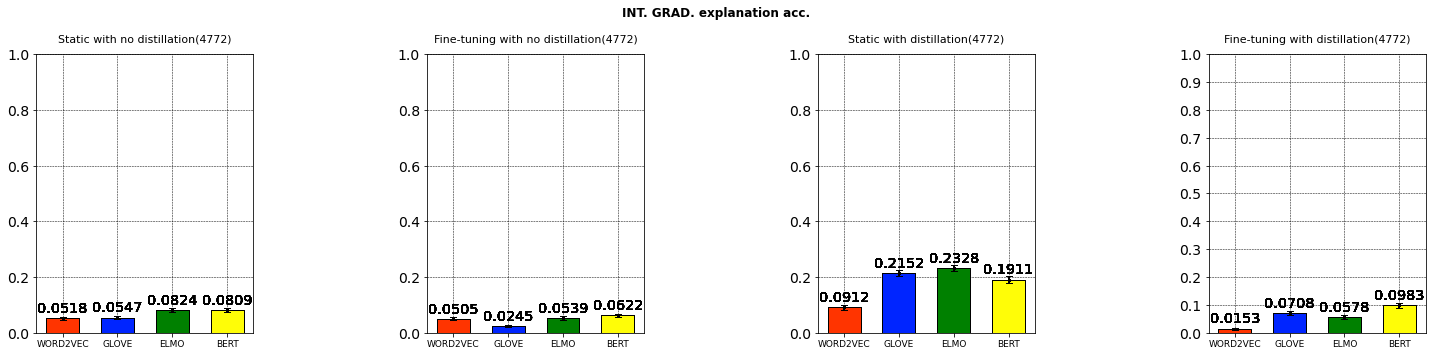

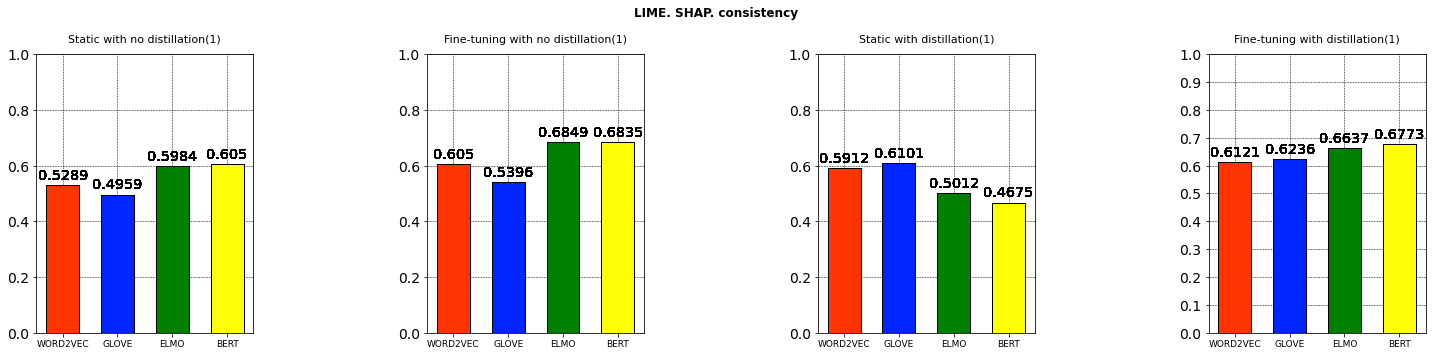

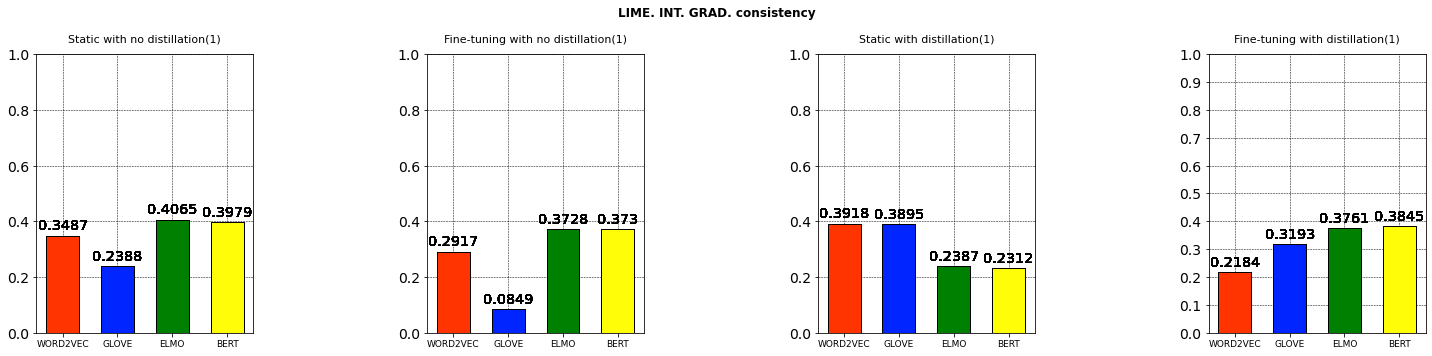

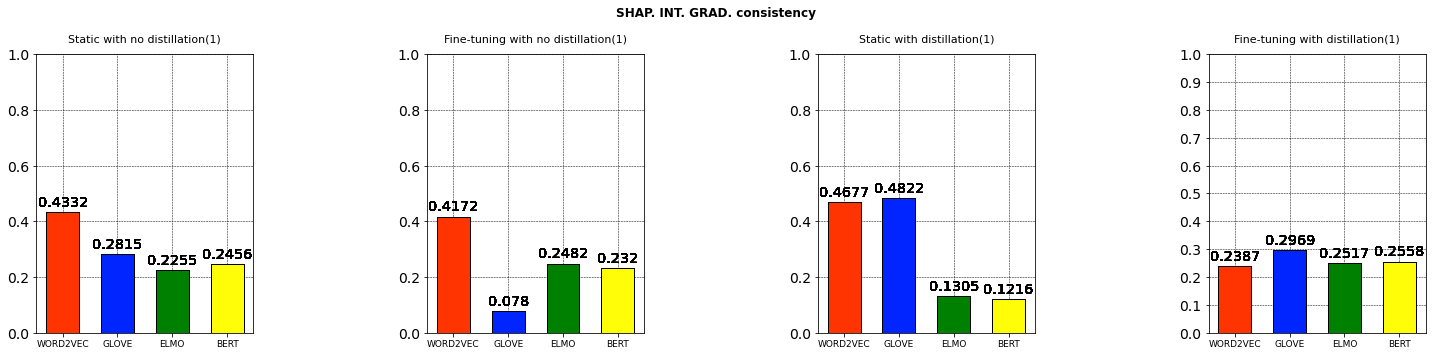

In [22]:
FIZ_SIZE = (20, 5)

#### Plots ####
plot_sent_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_shap_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_int_grad_acc_bar_plots(configurations, distributions, FIZ_SIZE)

#### Pearson Corr. matrix ####
plot_lime_shap_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
plot_shap_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)

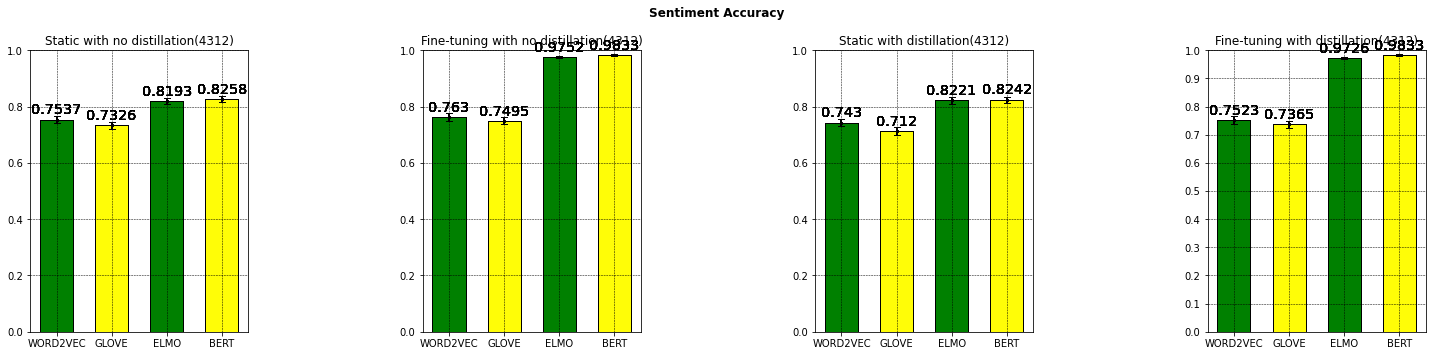

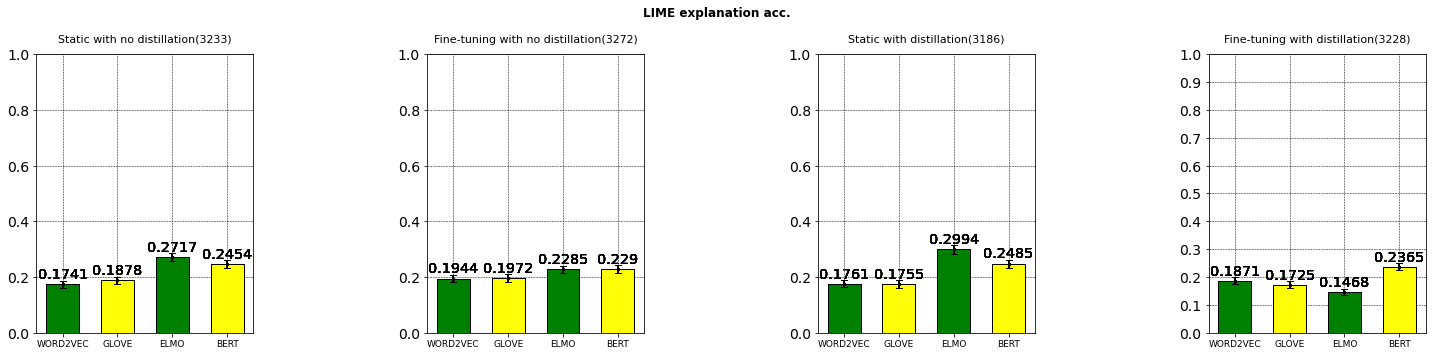

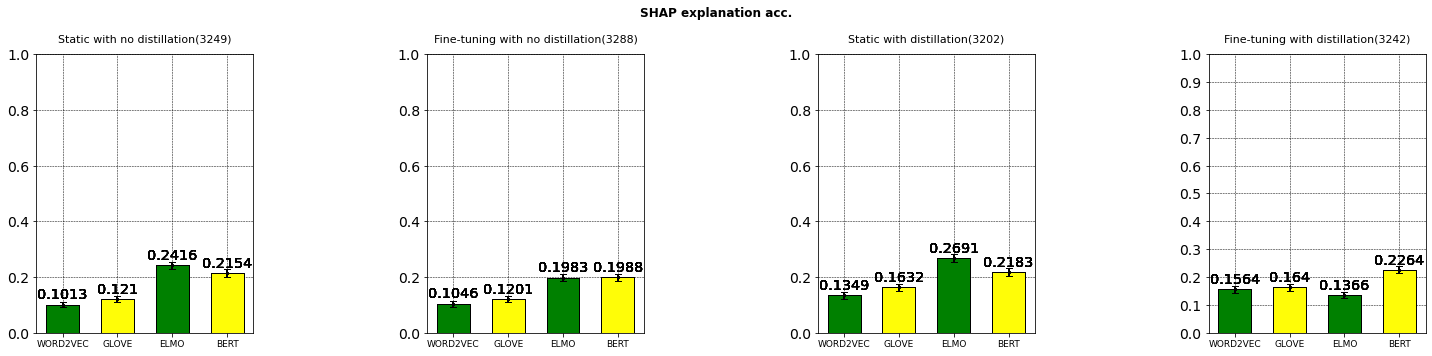

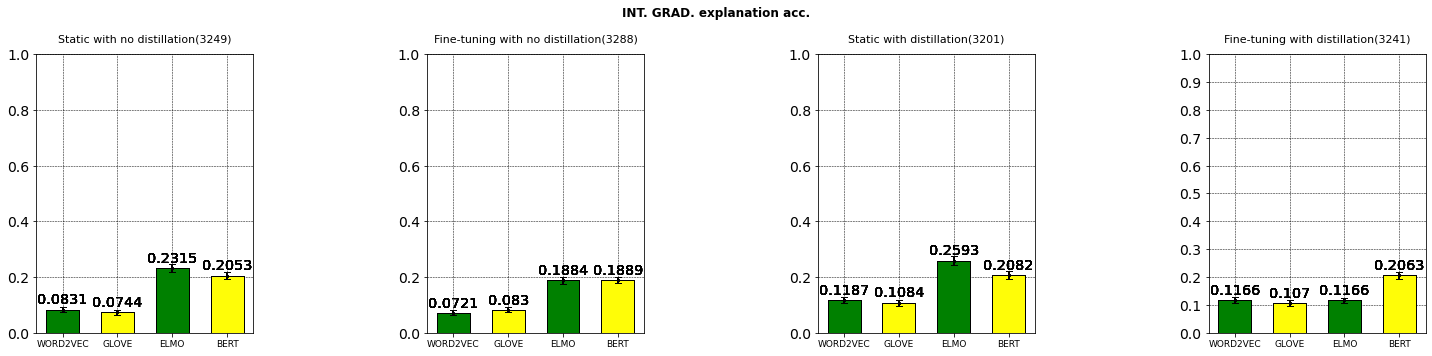

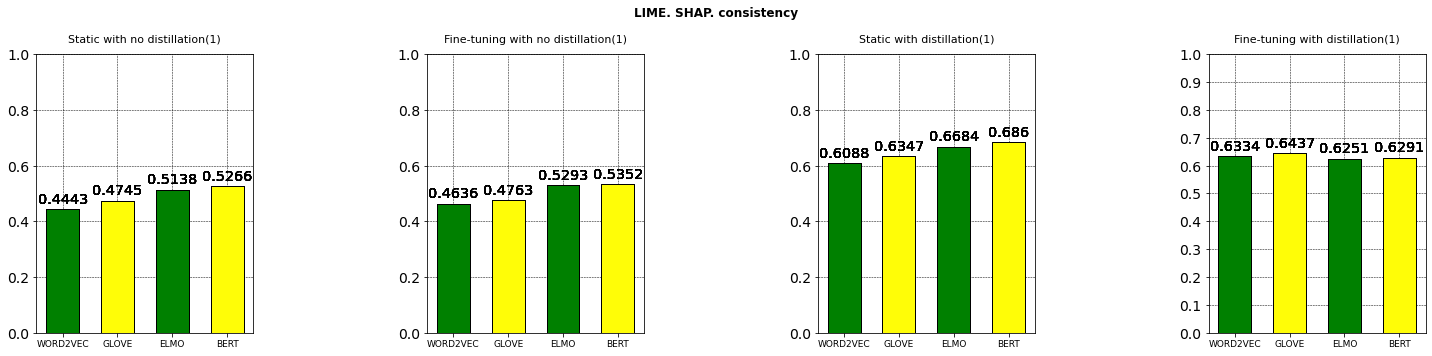

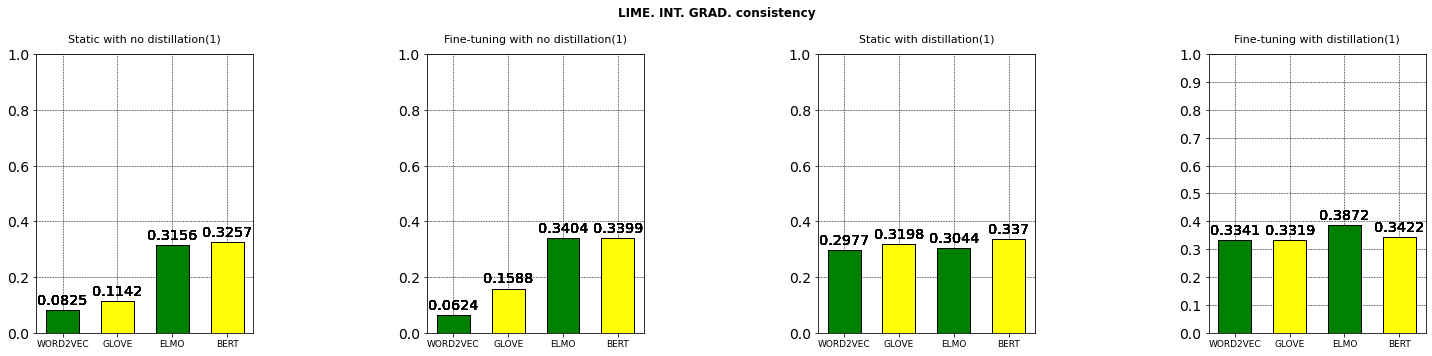

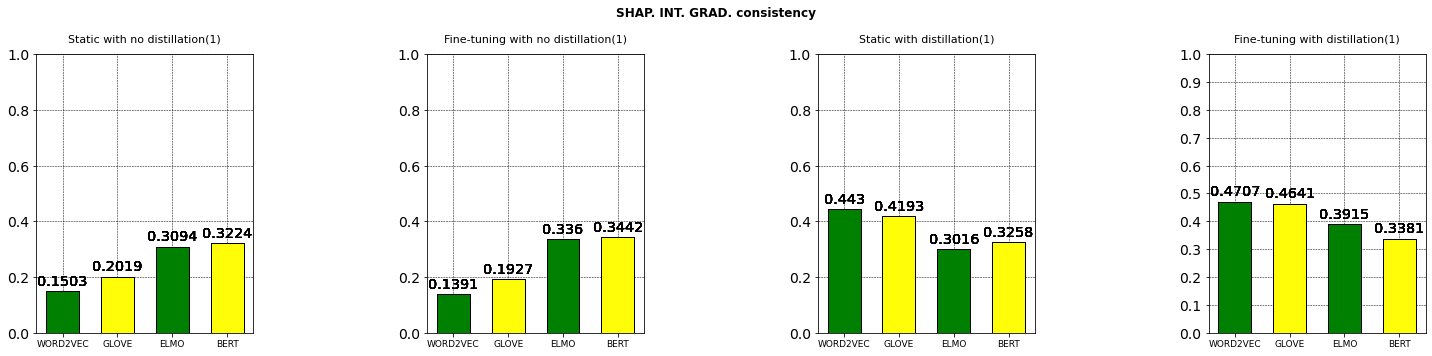

In [5]:
FIZ_SIZE = (20, 5)

#### Plots ####
plot_sent_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_shap_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_int_grad_acc_bar_plots(configurations, distributions, FIZ_SIZE)

#### Pearson Corr. matrix ####
plot_lime_shap_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
plot_shap_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)

In [107]:
densities

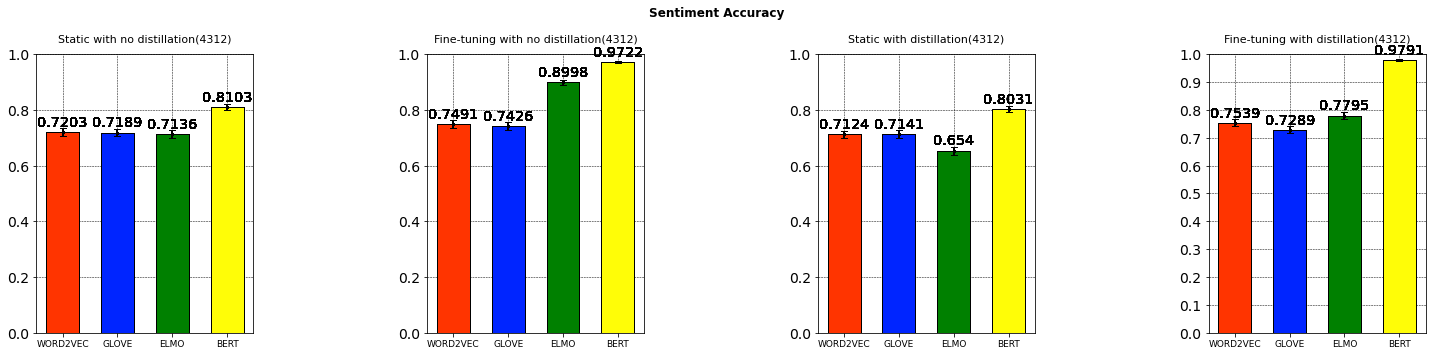

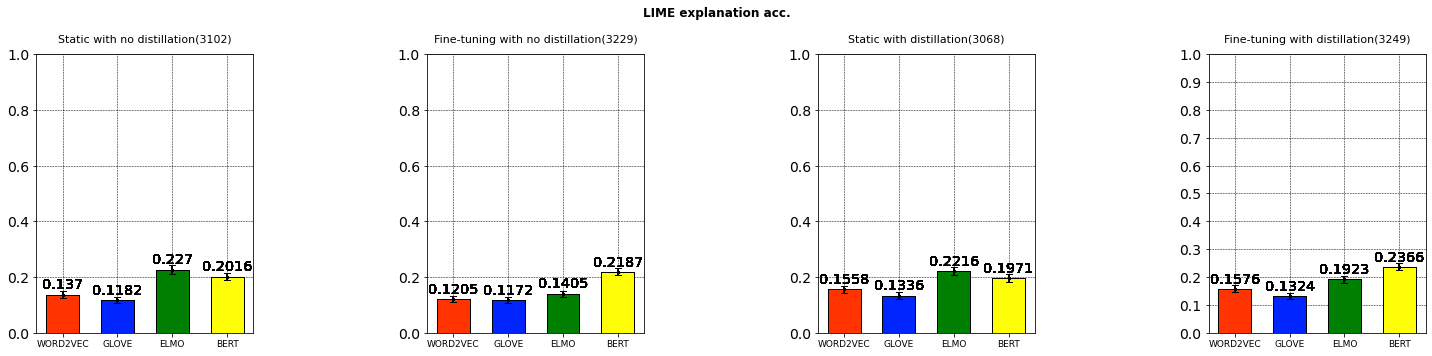

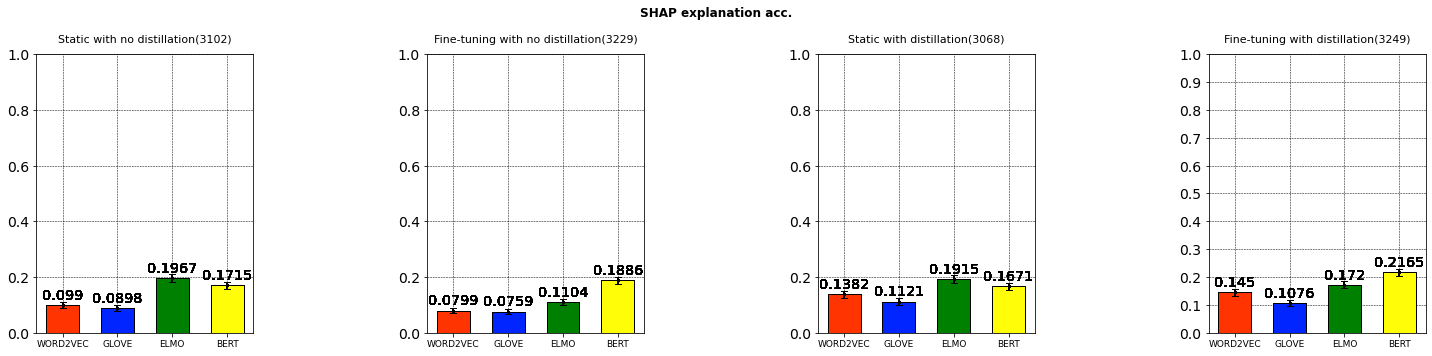

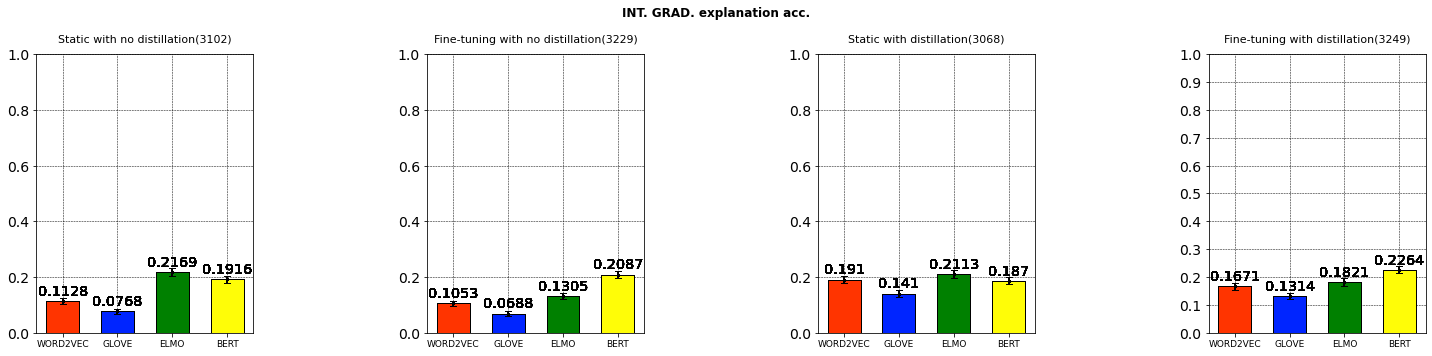

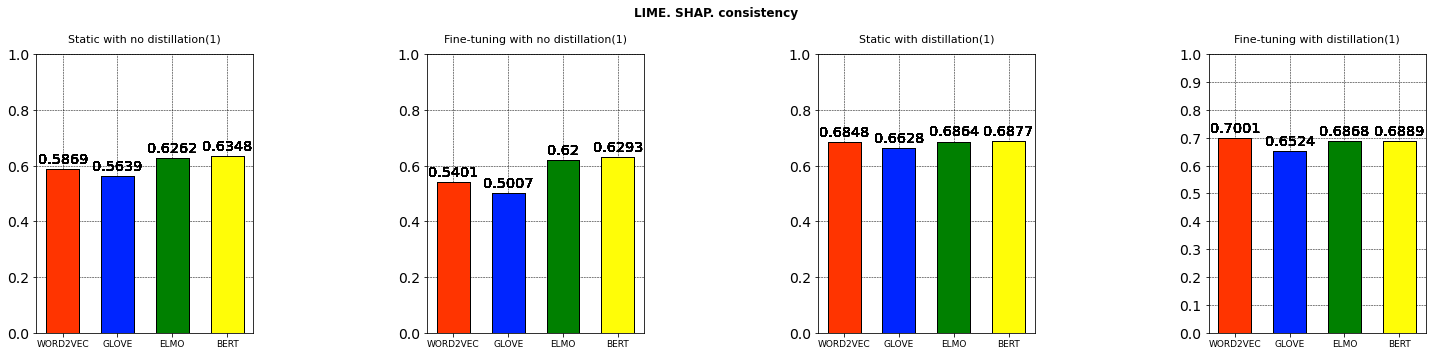

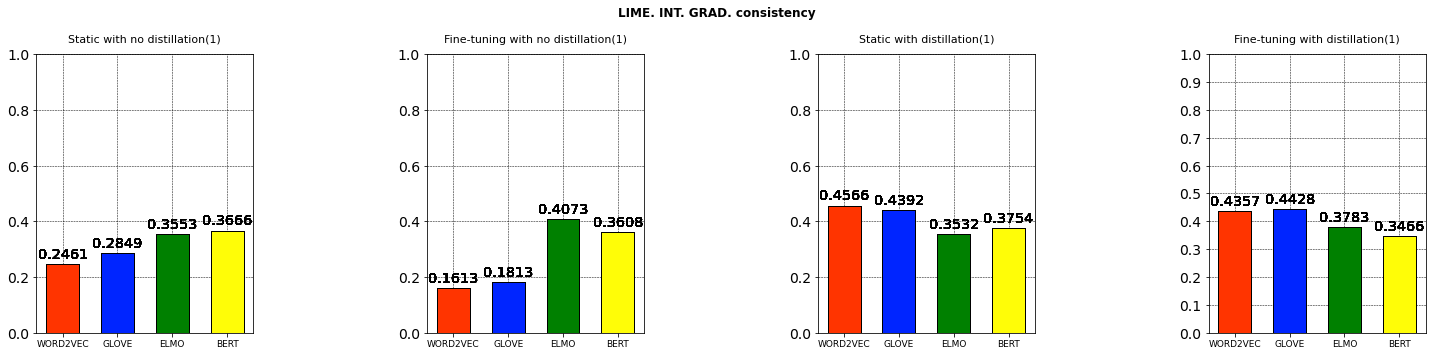

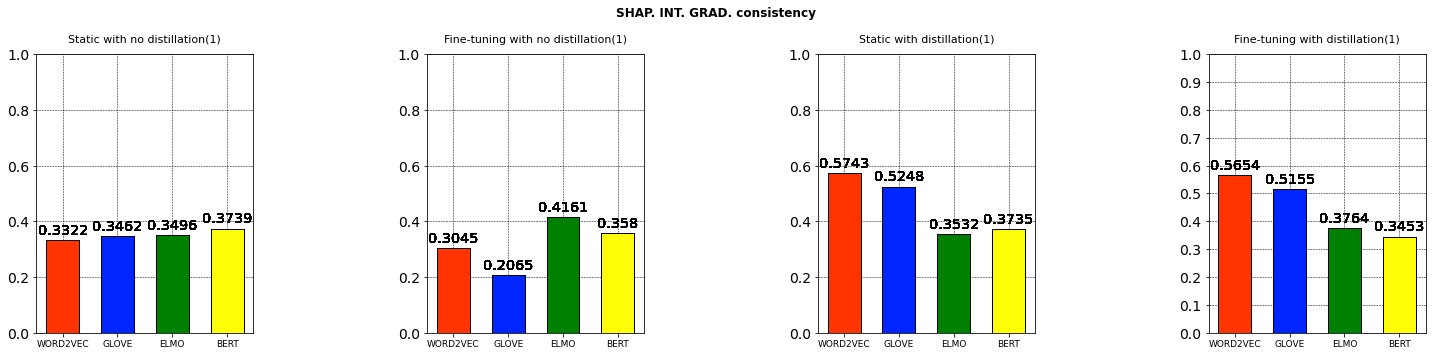

In [8]:
FIZ_SIZE = (20, 5)

#### Plots ####
plot_sent_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_shap_acc_bar_plots(configurations, distributions, FIZ_SIZE)
plot_int_grad_acc_bar_plots(configurations, distributions, FIZ_SIZE)

#### Pearson Corr. matrix ####
plot_lime_shap_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
plot_lime_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)
plot_shap_int_grad_consistency_bar_plots(configurations, distributions, FIZ_SIZE)

In [ ]:
def calculate_lime_acc(results_one_rule, results_explanations, K=10):

    EA_values = []
    counter = 0
    results_one_rule = pd.DataFrame(results_one_rule)
    results_explanations = pd.DataFrame(results_explanations)
    
    sentences = list(results_one_rule['sentence'])
    sent_predictions = list(results_one_rule['sentiment_prediction_output'])
    sent_labels = list(results_one_rule['sentiment_label'])
    rule_labels = list(results_one_rule['rule_label'])
    contrasts = list(results_one_rule['contrast'])
    explanations = list(results_explanations["LIME_explanation_normalised"])
    
    for index, sentence in enumerate(sentences):
        
        # Select LIME and SHAP explanations corresponding to those tokens
        exp = explanations[index]

        # Check 1: sentiment prediction = sentiment label
        if sent_predictions[index] != sent_labels[index]:
            continue
        
        # Check 2: Drop the sentences for which LIME explanation couldn't be calculated
        if explanations[index] == "couldn't process":
            continue

        # Check if A&B conjuncts contains 1 token atleast
        if rule_labels[index] == 1:
            tokenized_sentence = sentence.split()
            rule_word_index = tokenized_sentence.index("but")
            A_conjunct = tokenized_sentence[:rule_word_index]
            B_conjunct = tokenized_sentence[rule_word_index+1:len(tokenized_sentence)]
            A_conjunct_exp = exp[0:rule_word_index]
            B_conjunct_exp = exp[rule_word_index+1:len(tokenized_sentence)]
            if len(A_conjunct) == 0 or len(B_conjunct) == 0 or len(A_conjunct_exp) == 0 or len(B_conjunct_exp)==0:
                continue
        
        A_conjunct_exp = sorted(A_conjunct_exp, reverse=True)
        B_conjunct_exp = sorted(B_conjunct_exp, reverse=True)
        k = 5
        A_conjunct_exp_tokens = A_conjunct_exp[0:k]
        B_conjunct_exp_tokens = B_conjunct_exp[0:k]
        p_value = ttest_ind(A_conjunct_exp_tokens, B_conjunct_exp_tokens)[1]
        if np.sum(A_conjunct_exp_tokens) > np.sum(B_conjunct_exp_tokens) and p_value < 0.05:
            EA_value = 0
            EA_values.append(EA_value)
        elif np.sum(A_conjunct_exp_tokens) < np.sum(B_conjunct_exp_tokens) and p_value < 0.05:
            EA_value = 1
            EA_values.append(EA_value)
        else:
            EA_value = 0
            EA_values.append(EA_value)

    return EA_values

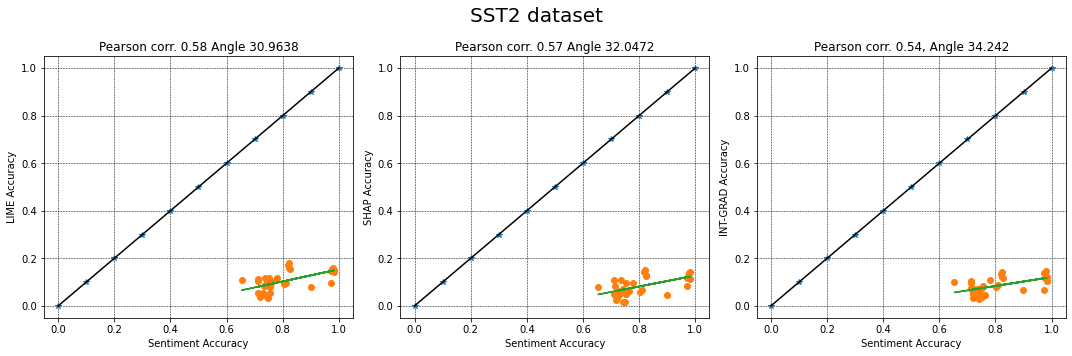

In [11]:
# ### Scatter Plots ###
# import matplotlib.pyplot as plt
# import seaborn as sns
# from numpy.polynomial.polynomial import polyfit

# # Sentiment140
# x_sent_acc = []
# y_lime_acc = []
# y_shap_acc = []
# y_int_grad_acc = []
# for config in configurations:
#     try:
#         base_model = config.split("-")[0]
#         word_vectors = config.split("-")[1]
#         fine_tuning = config.split("-")[2]
#         dataset = config.split("-")[3]
#         validation_method = config.split("-")[4]
#         if "DISTILLATION" in config.split("-"):
#             distillation = config.split("-")[5]
#             sent_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["sent_acc"]
#             x_sent_acc.append(sum(sent_acc)/len(sent_acc))
#             lime_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime"]
#             y_lime_acc.append(sum(lime_acc)/len(lime_acc))
#             shap_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_shap"]
#             y_shap_acc.append(sum(shap_acc)/len(shap_acc))
#             int_grad_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_int_grad"]
#             y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))
#         else: 
#             sent_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["sent_acc"]
#             x_sent_acc.append(sum(sent_acc)/len(sent_acc))
#             lime_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime"]
#             y_lime_acc.append(sum(lime_acc)/len(lime_acc))
#             shap_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_shap"]
#             y_shap_acc.append(sum(shap_acc)/len(shap_acc))
#             int_grad_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_int_grad"]
#             y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))
#     except:
#         base_model = config.split("-")[0]
#         word_vectors = config.split("-")[1]
#         fine_tuning = config.split("-")[2]
#         validation_method = config.split("-")[3]
#         if "DISTILLATION" in config.split("-"):
#             distillation = config.split("-")[4]
#             sent_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["sent_acc"]
#             x_sent_acc.append(sum(sent_acc)/len(sent_acc))
#             lime_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_lime"]
#             y_lime_acc.append(sum(lime_acc)/len(lime_acc))
#             shap_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_shap"]
#             y_shap_acc.append(sum(shap_acc)/len(shap_acc))
#             int_grad_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_int_grad"]
#             y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))
#         else: 
#             sent_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["sent_acc"]
#             x_sent_acc.append(sum(sent_acc)/len(sent_acc))
#             lime_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_lime"]
#             y_lime_acc.append(sum(lime_acc)/len(lime_acc))
#             shap_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_shap"]
#             y_shap_acc.append(sum(shap_acc)/len(shap_acc))
#             int_grad_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_int_grad"]
#             y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# plt.grid()

# def slope(x1, y1, x2, y2):
#     m = (y2-y1)/(x2-x1)
#     return m

# from math import atan
# def findAngle(M1, M2):
#     PI = 3.14159265
#     angle = abs((M2 - M1) / (1 + M1 * M2))
#     ret = atan(angle)
#     val = (ret * 180) / PI
#     return round(val, 4)

# # x = [0.6, 0.7, 0.8]
# # y = [0.0, 0.1, 0.2]
# x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# y = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# ax1.plot(x, y, '*')
# m, b = np.polyfit(x, y, 1)
# ax1.plot(x, m*np.array(x)+b, color="black")
# ax1.plot(x_sent_acc, y_lime_acc, 'o')
# m, b = np.polyfit(x_sent_acc, y_lime_acc, 1)
# points = m*np.array(x_sent_acc)+b
# ax1.plot(x_sent_acc, points)
# m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
# m2 = round(slope(x_sent_acc[0], points[0], x_sent_acc[1], points[1]), 2)
# angle = findAngle(m1, m2)
# ax1.set_title('Pearson corr. '+str(round(np.corrcoef(x_sent_acc, y_lime_acc)[0][1], 2))+" "
#              'Angle '+str(angle))

# # x = [0.6, 0.7, 0.8, 0.9]
# # y = [0.0, 0.1, 0.2, 0.3]
# x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# y = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# ax2.plot(x, y, '*')
# m, b = np.polyfit(x, y, 1)
# ax2.plot(x, m*np.array(x)+b, color="black")
# ax2.plot(x_sent_acc, y_shap_acc, 'o')
# m, b = np.polyfit(x_sent_acc, y_shap_acc, 1)
# points = m*np.array(x_sent_acc)+b
# ax2.plot(x_sent_acc, points)
# m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
# m2 = round(slope(x_sent_acc[0], points[0], x_sent_acc[1], points[1]), 2)
# angle = findAngle(m1, m2)
# ax2.set_title('Pearson corr. '+str(round(np.corrcoef(x_sent_acc, y_shap_acc)[0][1], 2))+" "
#              'Angle '+str(angle))

# # x = [0.6, 0.7, 0.8, 0.9]
# # y = [0.0, 0.1, 0.2, 0.3]
# x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# y = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# ax3.plot(x, y, '*')
# m, b = np.polyfit(x, y, 1)
# ax3.plot(x, m*np.array(x)+b, color="black")
# ax3.plot(x_sent_acc, y_int_grad_acc, 'o')
# m, b = np.polyfit(x_sent_acc, y_int_grad_acc, 1)
# points = m*np.array(x_sent_acc)+b
# ax3.plot(x_sent_acc, points)
# m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
# m2 = round(slope(x_sent_acc[0], points[0], x_sent_acc[1], points[1]), 2)
# angle = findAngle(m1, m2)
# ax3.set_title('Pearson corr. '+str(round(np.corrcoef(x_sent_acc, y_int_grad_acc)[0][1], 2))+", "
#              'Angle '+str(angle))

# ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)

# # ax1.set_xlim(0.6, 0.8)
# # ax1.set_ylim(0.0, 0.2)

# # ax2.set_xlim(0.6, 0.9)
# # ax2.set_ylim(0.0, 0.3)

# # ax3.set_xlim(0.6, 0.9)
# # ax3.set_ylim(0.0, 0.3)

# ax1.set_xlabel("Sentiment Accuracy")
# ax1.set_ylabel("LIME Accuracy")

# ax2.set_xlabel("Sentiment Accuracy")
# ax2.set_ylabel("SHAP Accuracy")

# ax3.set_xlabel("Sentiment Accuracy")
# ax3.set_ylabel("INT-GRAD Accuracy")

# fig.suptitle('SST2 dataset', fontsize=20)
# plt.savefig('analysis/CompLing_results/sst2.png', bbox_inches = 'tight')
# plt.tight_layout()
# plt.show()

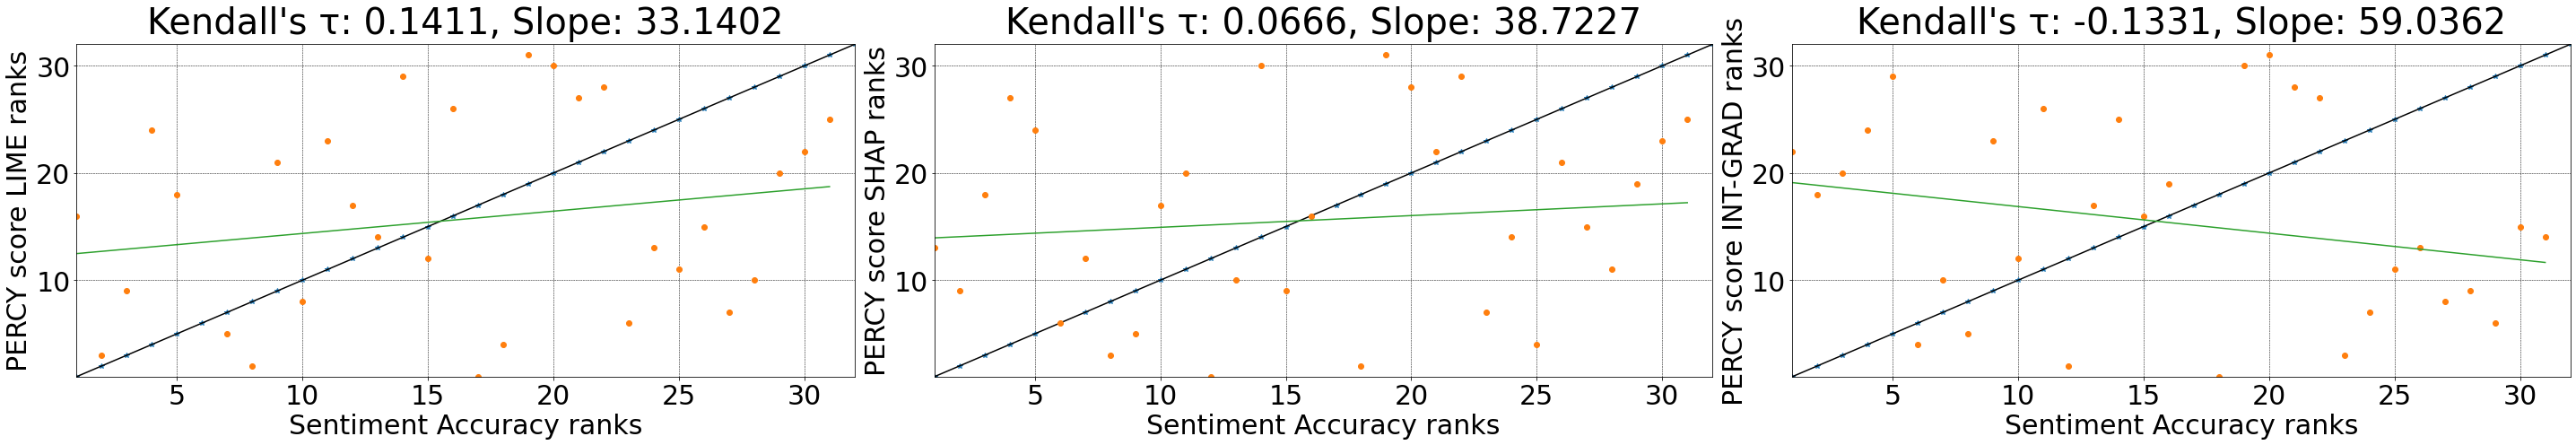

In [136]:
dataset = "SENTIMENT140"

### Scatter Plots ###
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

# Sentiment140
x_sent_acc = []
y_lime_acc = []
y_shap_acc = []
y_int_grad_acc = []
for config in configurations:
    try:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = config.split("-")[3]
        validation_method = config.split("-")[4]
        if "DISTILLATION" in config.split("-"):
            distillation = config.split("-")[5]
            sent_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["sent_acc"]
            x_sent_acc.append(sum(sent_acc)/len(sent_acc))
            lime_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime"]
            y_lime_acc.append(sum(lime_acc)/len(lime_acc))
            shap_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_shap"]
            y_shap_acc.append(sum(shap_acc)/len(shap_acc))
            int_grad_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_int_grad"]
            y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))
        else: 
            sent_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["sent_acc"]
            x_sent_acc.append(sum(sent_acc)/len(sent_acc))
            lime_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime"]
            y_lime_acc.append(sum(lime_acc)/len(lime_acc))
            shap_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_shap"]
            y_shap_acc.append(sum(shap_acc)/len(shap_acc))
            int_grad_acc = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_int_grad"]
            y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))
    except:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        validation_method = config.split("-")[3]
        if "DISTILLATION" in config.split("-"):
            distillation = config.split("-")[4]
            sent_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["sent_acc"]
            x_sent_acc.append(sum(sent_acc)/len(sent_acc))
            lime_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_lime"]
            y_lime_acc.append(sum(lime_acc)/len(lime_acc))
            shap_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_shap"]
            y_shap_acc.append(sum(shap_acc)/len(shap_acc))
            int_grad_acc = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_int_grad"]
            y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))
        else: 
            sent_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["sent_acc"]
            x_sent_acc.append(sum(sent_acc)/len(sent_acc))
            lime_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_lime"]
            y_lime_acc.append(sum(lime_acc)/len(lime_acc))
            shap_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_shap"]
            y_shap_acc.append(sum(shap_acc)/len(shap_acc))
            int_grad_acc = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_int_grad"]
            y_int_grad_acc.append(sum(int_grad_acc)/len(int_grad_acc))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 7))
plt.grid()

def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

from math import atan
def findAngle(M1, M2):
    PI = 3.14159265
    angle = abs((M2 - M1) / (1 + M1 * M2))
    ret = atan(angle)
    val = (ret * 180) / PI
    return round(val, 4)


x = [val for val in range(1, 33)]
y = [val for val in range(1, 33)]
ax1.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*np.array(x)+b, color="black")
import scipy.stats as ss
x_sent_acc_rank = list(len(x_sent_acc) - rankdata(x_sent_acc).astype(int))
y_lime_acc_rank = list(len(y_lime_acc) - rankdata(y_lime_acc).astype(int))
x_sent_acc_rank_sorted = sorted(x_sent_acc_rank)
y_lime_acc_rank_updated = []
for value in x_sent_acc_rank_sorted:
    value_index = x_sent_acc_rank.index(value)
    y_lime_acc_rank_value = y_lime_acc_rank[value_index]
    y_lime_acc_rank_updated.append(y_lime_acc_rank_value)
ax1.plot(x_sent_acc_rank_sorted, y_lime_acc_rank_updated, 'o')
m, b = np.polyfit(x_sent_acc_rank_sorted, y_lime_acc_rank_updated, 1)
points = m*np.array(x_sent_acc_rank_sorted)+b
ax1.plot(x_sent_acc_rank_sorted, points)
m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
m2 = round(slope(x_sent_acc_rank_sorted[0], points[0], x_sent_acc_rank_sorted[1], points[1]), 2)
angle = findAngle(m1, m2)
ax1.set_title("Kendall's τ: "+str(round(ss.kendalltau(x_sent_acc_rank_sorted, y_lime_acc_rank_updated)[0], 4))+", "
             'Slope: '+str(angle))

x = [val for val in range(1, 33)]
y = [val for val in range(1, 33)]
ax2.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*np.array(x)+b, color="black")
import scipy.stats as ss
x_sent_acc_rank = list(len(x_sent_acc) - rankdata(x_sent_acc).astype(int))
y_shap_acc_rank = list(len(y_shap_acc) - rankdata(y_shap_acc).astype(int))
x_sent_acc_rank_sorted = sorted(x_sent_acc_rank)
y_shap_acc_rank_updated = []
for value in x_sent_acc_rank_sorted:
    value_index = x_sent_acc_rank.index(value)
    y_shap_acc_rank_value = y_shap_acc_rank[value_index]
    y_shap_acc_rank_updated.append(y_shap_acc_rank_value)
ax2.plot(x_sent_acc_rank_sorted, y_shap_acc_rank_updated, 'o')
m, b = np.polyfit(x_sent_acc_rank_sorted, y_shap_acc_rank_updated, 1)
points = m*np.array(x_sent_acc_rank_sorted)+b
ax2.plot(x_sent_acc_rank_sorted, points)
m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
m2 = round(slope(x_sent_acc_rank_sorted[0], points[0], x_sent_acc_rank_sorted[1], points[1]), 2)
angle = findAngle(m1, m2)
ax2.set_title("Kendall's τ: "+str(round(ss.kendalltau(x_sent_acc_rank_sorted, y_shap_acc_rank_updated)[0], 4))+", "
             'Slope: '+str(angle))

x = [val for val in range(1, 33)]
y = [val for val in range(1, 33)]
ax3.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
ax3.plot(x, m*np.array(x)+b, color="black")
import scipy.stats as ss
x_sent_acc_rank = list(len(x_sent_acc) - rankdata(x_sent_acc).astype(int))
y_int_grad_acc_rank = list(len(y_int_grad_acc) - rankdata(y_int_grad_acc).astype(int))
x_sent_acc_rank_sorted = sorted(x_sent_acc_rank)
y_int_grad_acc_rank_updated = []
for value in x_sent_acc_rank_sorted:
    value_index = x_sent_acc_rank.index(value)
    y_int_grad_acc_rank_value = y_int_grad_acc_rank[value_index]
    y_int_grad_acc_rank_updated.append(y_int_grad_acc_rank_value)
ax3.plot(x_sent_acc_rank_sorted, y_int_grad_acc_rank_updated, 'o')
m, b = np.polyfit(x_sent_acc_rank_sorted, y_int_grad_acc_rank_updated, 1)
points = m*np.array(x_sent_acc_rank_sorted)+b
ax3.plot(x_sent_acc_rank_sorted, points)
m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
m2 = round(slope(x_sent_acc_rank_sorted[0], points[0], x_sent_acc_rank_sorted[1], points[1]), 2)
angle = findAngle(m1, m2)
ax3.set_title("Kendall's τ: "+str(round(ss.kendalltau(x_sent_acc_rank_sorted, y_int_grad_acc_rank_updated)[0], 4))+", "
             'Slope: '+str(angle))

# fig.suptitle(dataset, weight="bold", x=0.51, y=1.1)

ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax1.set_xlim(1, 32)
ax1.set_ylim(1, 32)

ax2.set_xlim(1, 32)
ax2.set_ylim(1, 32)

ax3.set_xlim(1, 32)
ax3.set_ylim(1, 32)

ax1.set_xlabel("Sentiment Accuracy ranks")
ax1.set_ylabel("PERCY score LIME ranks")

ax2.set_xlabel("Sentiment Accuracy ranks")
ax2.set_ylabel("PERCY score SHAP ranks")

ax3.set_xlabel("Sentiment Accuracy ranks")
ax3.set_ylabel("PERCY score INT-GRAD ranks")

params = {'figure.titlesize':40,
            'legend.fontsize': 20,
            'axes.labelsize': 30,
            'axes.titlesize': 40,
            'xtick.labelsize': 30,
            'ytick.labelsize': 30,
            'axes.titlepad': 12,
            'axes.axisbelow': True}
plt.rcParams.update(params)

plt.savefig('analysis/CompLing_results/'+dataset+'_scatter_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.tight_layout()
plt.show()

### Dataset details

In [ ]:
EA_values = []
EA_values_indices = []
stat_sig_mean_diff_corr = []
stat_insig_mean_diff_corr = []
stat_sig_mean_diff_incorr = []
stat_insig_mean_diff_incorr = []

with open("elmo_pytorch/assets/results/CNN-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING.pickle", 'rb') as handle:
    results = pickle.load(handle)
    results = pd.DataFrame(results)
    results_one_rule = results.loc[results["rule_label"]==1].reset_index(drop=True)
with open("w2v_and_glove/assets/shap_explanations/CNN-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING.pickle", 'rb') as handle:
    results_explanations = pickle.load(handle)
    results_explanations = pd.DataFrame(results_explanations)

sentences = list(results_one_rule['sentence'])
sent_predictions = list(results_one_rule['sentiment_prediction_output'])
sent_labels = list(results_one_rule['sentiment_label'])
rule_labels = list(results_one_rule['rule_label'])
contrasts = list(results_one_rule['contrast'])

explanations = list(explanations["SHAP_explanation_normalised"])

for index, sentence in enumerate(sentences):

    # Select SHAP explanations corresponding to those tokens
    exp = explanations[index]

    # Check 1: Sentiment prediction = sentiment label
    if sent_predictions[index] != sent_labels[index]:
        continue

    # Check 2: Drop the sentences for which LIME explanation couldn't be calculated
    if explanations[index] == "couldn't process":
        continue

    # Check if A&B conjuncts contains 1 token atleast
    if rule_labels[index] == 1:
        tokenized_sentence = sentence.split()
        rule_word_index = tokenized_sentence.index("but")
        A_conjunct = tokenized_sentence[:rule_word_index]
        B_conjunct = tokenized_sentence[rule_word_index+1:len(tokenized_sentence)]
        A_conjunct_exp = exp[0:rule_word_index]
        B_conjunct_exp = exp[rule_word_index+1:len(tokenized_sentence)]
        if len(A_conjunct) == 0 or len(B_conjunct) == 0 or len(A_conjunct_exp) == 0 or len(B_conjunct_exp)==0:
            continue

    # Calculate EA values on those datapoints for SHAP    
    p_value = ttest_ind(exp[0:rule_word_index], exp[rule_word_index+1:len(tokenized_sentence)])[1] # For difference to be statistically significant

#     if np.mean(exp[0:rule_word_index]) > np.mean(exp[rule_word_index+1:len(tokenized_sentence)]):
#         if p_value < 0.05:
#             EA_value = 0
#             EA_values.append(EA_value)
#             stat_sig_mean_diff_incorr.append(np.mean(exp[0:rule_word_index])-np.mean(exp[rule_word_index+1:len(tokenized_sentence)]))
#         elif p_value > 0.05:
#             stat_insig_mean_diff_incorr.append(np.mean(exp[0:rule_word_index])-np.mean(exp[rule_word_index+1:len(tokenized_sentence)]))
            
#     elif np.mean(exp[0:rule_word_index]) < np.mean(exp[rule_word_index+1:len(tokenized_sentence)]):
#         if p_value < 0.05:
#             EA_value = 1
#             EA_values.append(EA_value)
#             stat_sig_mean_diff_corr.append(np.mean(exp[rule_word_index+1:len(tokenized_sentence)])-np.mean(exp[0:rule_word_index]))
#         elif p_value > 0.05:
#             stat_insig_mean_diff_corr.append(np.mean(exp[rule_word_index+1:len(tokenized_sentence)])-np.mean(exp[0:rule_word_index]))
            
#     else:
#         EA_value = 0
#         EA_values.append(EA_value)

    if np.mean(exp[0:rule_word_index]) < np.mean(exp[rule_word_index+1:len(tokenized_sentence)]) and p_value < 0.05:
        EA_value = 1
        EA_values.append(EA_value)
        EA_values_indices.append(index)
    else:
        EA_value = 0
        EA_values.append(EA_value)

print(sum(EA_values)/len(EA_values))

In [3]:
# Select the SHAP values of w2v
with open("w2v_and_glove/assets/shap_explanations/CNN-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING.pickle", "rb") as handle:
    explanations = pickle.load(handle)

# Select the EA_values of a Elmo model 
ea_values_lime_elmo = distributions["CNN"]["ELMO"]["STATIC"]["SENTIMENT140"]["EARLY_STOPPING"]["ea_values_lime"]

# Reduce the lime acc. as per the desired value
target_sum = 0.114*len(ea_values_lime_elmo)
no_of_1s = sum(ea_values_lime_elmo) - int(target_sum)
indices_of_1s = [index_of_1 for index_of_1, element in enumerate(ea_values_lime_elmo) if element==1]
indices_sample = random.sample(indices_of_1s, no_of_1s)
updated_dist = ea_values_lime_elmo.copy()
for index_val in indices_sample:
    updated_dist[index_val] = 0
    
# Adjust the updated_dist for desired pearson corr. value
indices_of_1s = [index_of_1 for index_of_1, element in enumerate(updated_dist) if element==1]
indices_of_0s = [index_of_0 for index_of_0, element in enumerate(updated_dist) if element==0]
indices_sample_1s = random.sample(indices_of_1s, int(len(indices_of_1s)*1/5))
indices_sample_0s = random.sample(indices_of_0s, int(len(indices_of_1s)*1/5))
for index_val in indices_sample_1s:
    updated_dist[index_val] = 0
for index_val in indices_sample_0s:
    updated_dist[index_val] = 1
my_rho = np.corrcoef(ea_values_lime_elmo, updated_dist)
print(my_rho[0][1])
    
# Add zeros to updated_dist so that len(updated_dist) == len(explanation)
while (len(updated_dist)!=len(explanations)):
    updated_dist.append(0)
    
# Adjust the explanation values in SHAP as per updated_dist
    # Increase B conjunct values at 1s by a statistically-significant margin
        # Replace exp. values by statistically significant values
        # Increase the values by some num betw (0-1)
    
    # Decrease A conjunct values at 0s
        # Replace exp. values by statistically insignificant values
        # Deacrease the values by some num betw (0-1)

random_indices = []
for index in updated_dist:
    if index in EA_values_indices:
        continue
    else:
        random_index = random.choice(EA_values_indices)
        shap_exp = explanations["SHAP_explanation"][random_index]
        shap_exp_norm = explanations["SHAP_explanation_normalised"][random_index]
#         increase = random.uniform(0, 1)
#         for index, val in enumerate(shap_exp):
#             if val < 0:
#                 val = val - increase
#             elif val > 0:
#                 val = val + increase
#             shap_exp[index] = val
#         for index, val in enumerate(shap_exp):
#             val = val + increase
#             shap_exp[index] = val
#         print(shap_exp)
        keys = list(explanations.keys())
        keys.remove("SHAP_explanation")
        keys.remove("SHAP_explanation_normalised")
        keys.remove("sentence")
        for key in keys:
            explanations[key][index] = explanations[key][random_index]
        explanations["SHAP_explanation"][index] = shap_exp
        explanations["SHAP_explanation_normalised"][index] = shap_exp_norm
        
# Check the final EA values for both mean and max
    
    
# Save the asset
    


NameError: name 'distributions' is not defined

In [2]:
def preprocess_text(text, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' '):
        """
        Preprocess text as per Keras Tokenizer preprocess code. 
        Tokenize by just sentence.split()
        Whole process is similar to Keras Tokenizer
        """
        text = text.lower() # lower case
        maketrans = str.maketrans
        translate_dict = {c: split for c in filters}
        translate_map = maketrans(translate_dict) 
        text = text.translate(translate_map) # remove all punctuations and replace them with whitespace (because puntuations mark as a whitespace between words)
        return text

def conjunction_analysis(dataset, rule_keywords=['but', 'yet', 'though', 'while']):
    """
    Count the sentences labeled with a particular rule like A-but-B in the dataset during dataset creation
    Perform a conjunction analysis for that rule in the sentences
    Check if both counts are equal
    If not equal, remove the datapoints which has the rule label but fails on its conjunction analysis
    """
    rule_keywords = set(rule_keywords)
    rule_labels = []
    contrasts = []
    for index, sentence in enumerate(dataset['sentence']): # Check for any rule structure in no rule sentences and remove any sentence containing a rule structure
        tokenized_sentence = sentence.split()
        if (set(tokenized_sentence).intersection(rule_keywords)==set(["but"]) and tokenized_sentence.index('but') != 0 and tokenized_sentence.index('but') != len(tokenized_sentence)-1 and tokenized_sentence.count('but') == 1):
            rule_labels.append(1)
            contrasts.append(1)
        elif (set(tokenized_sentence).intersection(rule_keywords)==set(["yet"]) and tokenized_sentence.index('yet') != 0 and tokenized_sentence.index('yet') != len(tokenized_sentence)-1 and tokenized_sentence.count('yet') == 1):
            rule_labels.append(2)
            contrasts.append(1)
        elif (set(tokenized_sentence).intersection(rule_keywords)==set(["though"]) and tokenized_sentence.index('though') != 0 and tokenized_sentence.index('though') != len(tokenized_sentence)-1 and tokenized_sentence.count('though') == 1):
            rule_labels.append(3)
            contrasts.append(1)
        elif (set(tokenized_sentence).intersection(rule_keywords)==set(["while"]) and tokenized_sentence.index('while') != 0 and tokenized_sentence.index('while') != len(tokenized_sentence)-1 and tokenized_sentence.count('while') == 1):
            rule_labels.append(4)
            contrasts.append(1)
        else:
            rule_labels.append(0)
            contrasts.append(0)
    dataset["rule_label"] = rule_labels
    dataset["contrast"] = contrasts
    return dataset

def create_rule_masks(dataset):
    """
    create rule masks for each sentence in the dataset
    """
    rule_label_masks = []
    for index, sentence in enumerate(list(dataset['sentence'])):
        tokenized_sentence = sentence.split()
        rule_label = dataset['rule_label'][index]
        contrast = dataset['contrast'][index]
        try:
            if rule_label == 1 and contrast == 1:
                a_part_tokenized_sentence = tokenized_sentence[:tokenized_sentence.index("but")]
                b_part_tokenized_sentence = tokenized_sentence[tokenized_sentence.index("but")+1:]
                rule_label_mask = [0]*len(a_part_tokenized_sentence) + [0]*len(["but"]) + [1]*len(b_part_tokenized_sentence)
                rule_label_masks.append(rule_label_mask)

            elif rule_label == 2 and contrast == 1:
                a_part_tokenized_sentence = tokenized_sentence[:tokenized_sentence.index("yet")]
                b_part_tokenized_sentence = tokenized_sentence[tokenized_sentence.index("yet")+1:]
                rule_label_mask = [0]*len(a_part_tokenized_sentence) + [0]*len(["yet"]) + [1]*len(b_part_tokenized_sentence)
                rule_label_masks.append(rule_label_mask)

            elif rule_label == 3 and contrast == 1:
                a_part_tokenized_sentence = tokenized_sentence[:tokenized_sentence.index("though")]
                b_part_tokenized_sentence = tokenized_sentence[tokenized_sentence.index("though")+1:]
                rule_label_mask = [1]*len(a_part_tokenized_sentence) + [0]*len(["though"]) + [0]*len(b_part_tokenized_sentence)
                rule_label_masks.append(rule_label_mask)

            elif rule_label == 4 and contrast == 1:
                a_part_tokenized_sentence = tokenized_sentence[:tokenized_sentence.index("while")]
                b_part_tokenized_sentence = tokenized_sentence[tokenized_sentence.index("while")+1:]
                rule_label_mask = [1]*len(a_part_tokenized_sentence) + [0]*len(["while"]) + [0]*len(b_part_tokenized_sentence)
                rule_label_masks.append(rule_label_mask)

            else:
                mask_length = len(tokenized_sentence)
                rule_label_mask = [1]*mask_length
                rule_label_masks.append(rule_label_mask)
        except:
            mask_length = len(tokenized_sentence)
            rule_label_mask = [1]*mask_length
            rule_label_masks.append(rule_label_mask)
    dataset["rule_mask"] = rule_label_masks
    return dataset

In [71]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(list(range(dataset.shape[0])), test_size=0.2, random_state=123)
train_idx, val_idx = train_test_split(train_idx, test_size=0.25, random_state=123)
train_dataset = dataset.iloc[train_idx].reset_index(drop=True)
val_dataset = dataset.iloc[val_idx].reset_index(drop=True)
test_dataset = dataset.iloc[test_idx].reset_index(drop=True)

In [72]:
data = {"no_rule_pos":0,
        "no_rule_neg":0,
        "a_but_b_rule_positive":0,
        "a_but_b_rule_negative":0

#         "a_yet_b_rule_positive":0,
#         "a_yet_b_rule_negative":0,

#         "a_though_b_rule_positive":0,
#         "a_though_b_rule_negative":0,

#         "a_while_b_rule_positive":0,
#         "a_while_b_rule_negative":0,
        }

for index, sentence in enumerate(dataset["sentence"]):

    if dataset['sentiment_label'][index] == 1 and dataset['rule_label'][index] == 0:
        data["no_rule_pos"] += 1
    if dataset['sentiment_label'][index] == 0 and dataset['rule_label'][index] == 0:
        data["no_rule_neg"] += 1

    if dataset['sentiment_label'][index] == 1 and dataset['rule_label'][index] == 1:
        data["a_but_b_rule_positive"] += 1
    if dataset['sentiment_label'][index] == 0 and dataset['rule_label'][index] == 1:
        data["a_but_b_rule_negative"] += 1

#     if dataset['sentiment_label'][index] == 1 and dataset['rule_label'][index] == 2 and dataset['contrast'][index] == 1:
#         data["a_yet_b_rule_positive"] += 1
#     if dataset['sentiment_label'][index] == 0 and dataset['rule_label'][index] == 2 and dataset['contrast'][index] == 1:
#         data["a_yet_b_rule_negative"] += 1

#     if dataset['sentiment_label'][index] == 1 and dataset['rule_label'][index] == 3 and dataset['contrast'][index] == 1:
#         data["a_though_b_rule_positive"] += 1
#     if dataset['sentiment_label'][index] == 0 and dataset['rule_label'][index] == 3 and dataset['contrast'][index] == 1:
#         data["a_though_b_rule_negative"] += 1

#     if dataset['sentiment_label'][index] == 1 and dataset['rule_label'][index] == 4 and dataset['contrast'][index] == 1:
#         data["a_while_b_rule_positive"] += 1
#     if dataset['sentiment_label'][index] == 0 and dataset['rule_label'][index] == 4 and dataset['contrast'][index] == 1:
#         data["a_while_b_rule_negative"] += 1

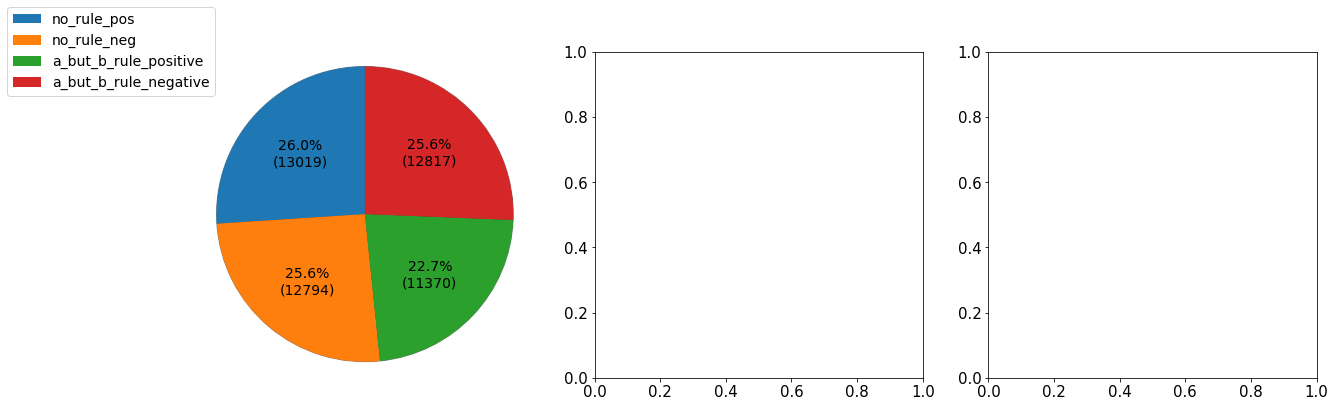

In [73]:
# Pie chart values
pie_chart_labels = ["no_rule_pos", 
                    "no_rule_neg", 
                    "a_but_b_rule_positive", 
                    "a_but_b_rule_negative"]
pie_chart_data_values = [data["no_rule_pos"], 
                         data["no_rule_neg"], 
                         data["a_but_b_rule_positive"], 
                         data["a_but_b_rule_negative"]]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

pie_chart_fig, (pie_chart_ax1, pie_chart_ax2, pie_chart_ax3) = plt.subplots(1, 3, figsize=(20, 6))

pie_chart_ax1.pie(pie_chart_data_values, autopct=lambda pct: func(pct, pie_chart_data_values), shadow=True, startangle=90, radius=3000)
pie_chart_ax1.axis('equal')
# pie_chart_ax1.set_title('Train dataset ('+str(df_train_dataset.shape[0])+')')

# pie_chart_fig.suptitle('Dataset Distributions')
pie_chart_fig.legend(pie_chart_labels, bbox_to_anchor=(-0.36, 0, 0.5, 1))
params = {'figure.titlesize':30,
          'legend.fontsize': 14,
          'font.size': 14,
          'axes.labelsize': 20,
          'axes.titlesize':20,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15,
          'axes.axisbelow': True}
plt.rcParams.update(params)

# pie_chart_fig.tight_layout()
# plt.savefig('analysis/plots/'+model+'/Dataset_compositions.png', bbox_inches = 'tight', facecolor='white')
pie_chart_fig.show()

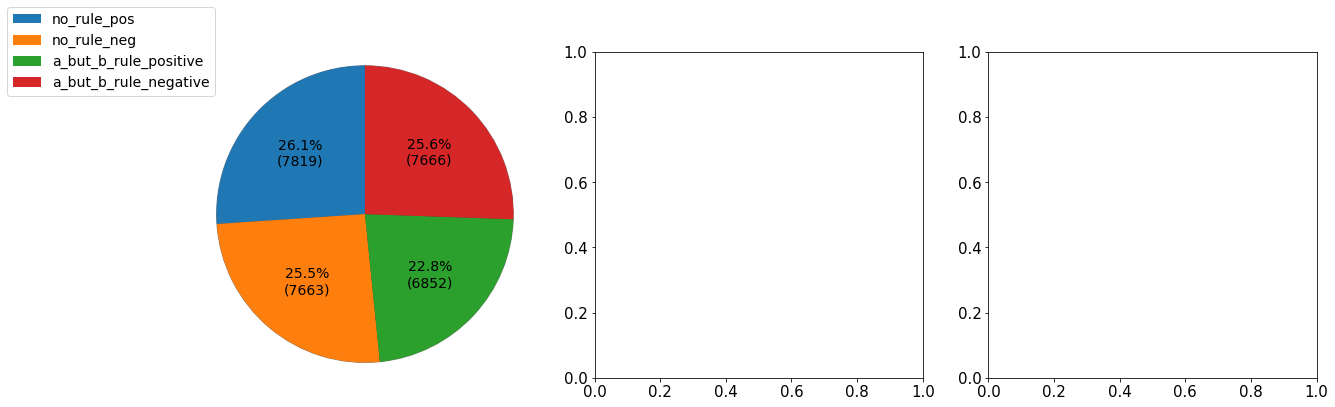

In [62]:
# Pie chart values
pie_chart_labels = ["no_rule_pos", 
                    "no_rule_neg", 
                    "a_but_b_rule_positive", 
                    "a_but_b_rule_negative"]
pie_chart_data_values = [data["no_rule_pos"], 
                         data["no_rule_neg"], 
                         data["a_but_b_rule_positive"], 
                         data["a_but_b_rule_negative"]]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

pie_chart_fig, (pie_chart_ax1, pie_chart_ax2, pie_chart_ax3) = plt.subplots(1, 3, figsize=(20, 6))

pie_chart_ax1.pie(pie_chart_data_values, autopct=lambda pct: func(pct, pie_chart_data_values), shadow=True, startangle=90, radius=3000)
pie_chart_ax1.axis('equal')
# pie_chart_ax1.set_title('Train dataset ('+str(df_train_dataset.shape[0])+')')

# pie_chart_fig.suptitle('Dataset Distributions')
pie_chart_fig.legend(pie_chart_labels, bbox_to_anchor=(-0.36, 0, 0.5, 1))
params = {'figure.titlesize':30,
          'legend.fontsize': 14,
          'font.size': 14,
          'axes.labelsize': 20,
          'axes.titlesize':20,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15,
          'axes.axisbelow': True}
plt.rcParams.update(params)

# pie_chart_fig.tight_layout()
# plt.savefig('analysis/plots/'+model+'/Dataset_compositions.png', bbox_inches = 'tight', facecolor='white')
pie_chart_fig.show()

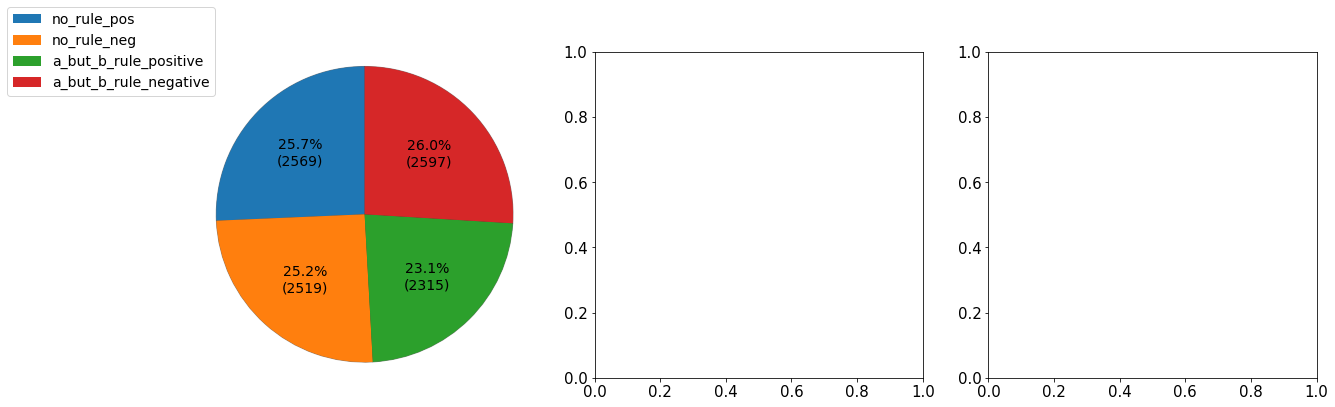

In [66]:
# Pie chart values
pie_chart_labels = ["no_rule_pos", 
                    "no_rule_neg", 
                    "a_but_b_rule_positive", 
                    "a_but_b_rule_negative"]
pie_chart_data_values = [data["no_rule_pos"], 
                         data["no_rule_neg"], 
                         data["a_but_b_rule_positive"], 
                         data["a_but_b_rule_negative"]]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

pie_chart_fig, (pie_chart_ax1, pie_chart_ax2, pie_chart_ax3) = plt.subplots(1, 3, figsize=(20, 6))

pie_chart_ax1.pie(pie_chart_data_values, autopct=lambda pct: func(pct, pie_chart_data_values), shadow=True, startangle=90, radius=3000)
pie_chart_ax1.axis('equal')
# pie_chart_ax1.set_title('Train dataset ('+str(df_train_dataset.shape[0])+')')

# pie_chart_fig.suptitle('Dataset Distributions')
pie_chart_fig.legend(pie_chart_labels, bbox_to_anchor=(-0.36, 0, 0.5, 1))
params = {'figure.titlesize':30,
          'legend.fontsize': 14,
          'font.size': 14,
          'axes.labelsize': 20,
          'axes.titlesize':20,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15,
          'axes.axisbelow': True}
plt.rcParams.update(params)

# pie_chart_fig.tight_layout()
# plt.savefig('analysis/plots/'+model+'/Dataset_compositions.png', bbox_inches = 'tight', facecolor='white')
pie_chart_fig.show()

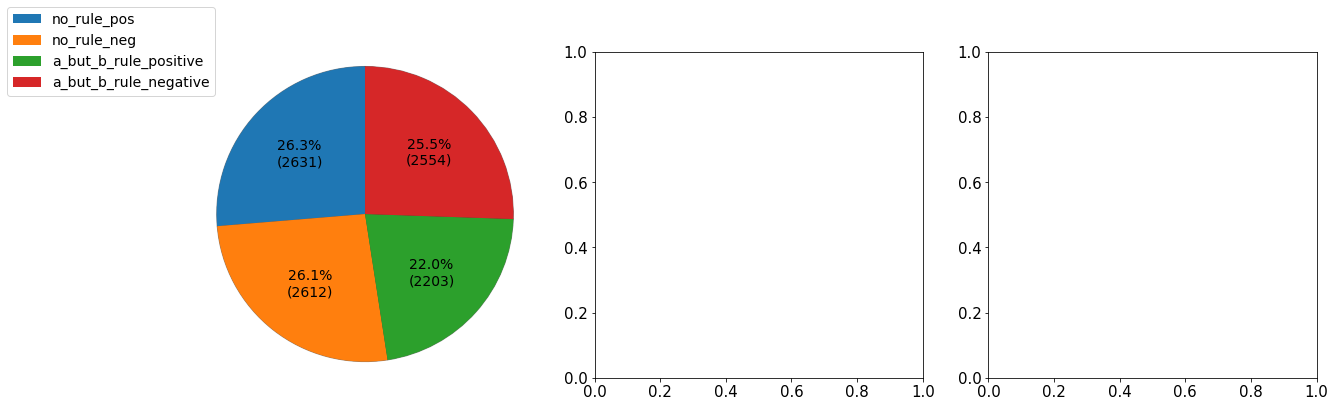

In [69]:
# Pie chart values
pie_chart_labels = ["no_rule_pos", 
                    "no_rule_neg", 
                    "a_but_b_rule_positive", 
                    "a_but_b_rule_negative"]
pie_chart_data_values = [data["no_rule_pos"], 
                         data["no_rule_neg"], 
                         data["a_but_b_rule_positive"], 
                         data["a_but_b_rule_negative"]]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

pie_chart_fig, (pie_chart_ax1, pie_chart_ax2, pie_chart_ax3) = plt.subplots(1, 3, figsize=(20, 6))

pie_chart_ax1.pie(pie_chart_data_values, autopct=lambda pct: func(pct, pie_chart_data_values), shadow=True, startangle=90, radius=3000)
pie_chart_ax1.axis('equal')
# pie_chart_ax1.set_title('Train dataset ('+str(df_train_dataset.shape[0])+')')

# pie_chart_fig.suptitle('Dataset Distributions')
pie_chart_fig.legend(pie_chart_labels, bbox_to_anchor=(-0.36, 0, 0.5, 1))
params = {'figure.titlesize':30,
          'legend.fontsize': 14,
          'font.size': 14,
          'axes.labelsize': 20,
          'axes.titlesize':20,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15,
          'axes.axisbelow': True}
plt.rcParams.update(params)

# pie_chart_fig.tight_layout()
# plt.savefig('analysis/plots/'+model+'/Dataset_compositions.png', bbox_inches = 'tight', facecolor='white')
pie_chart_fig.show()

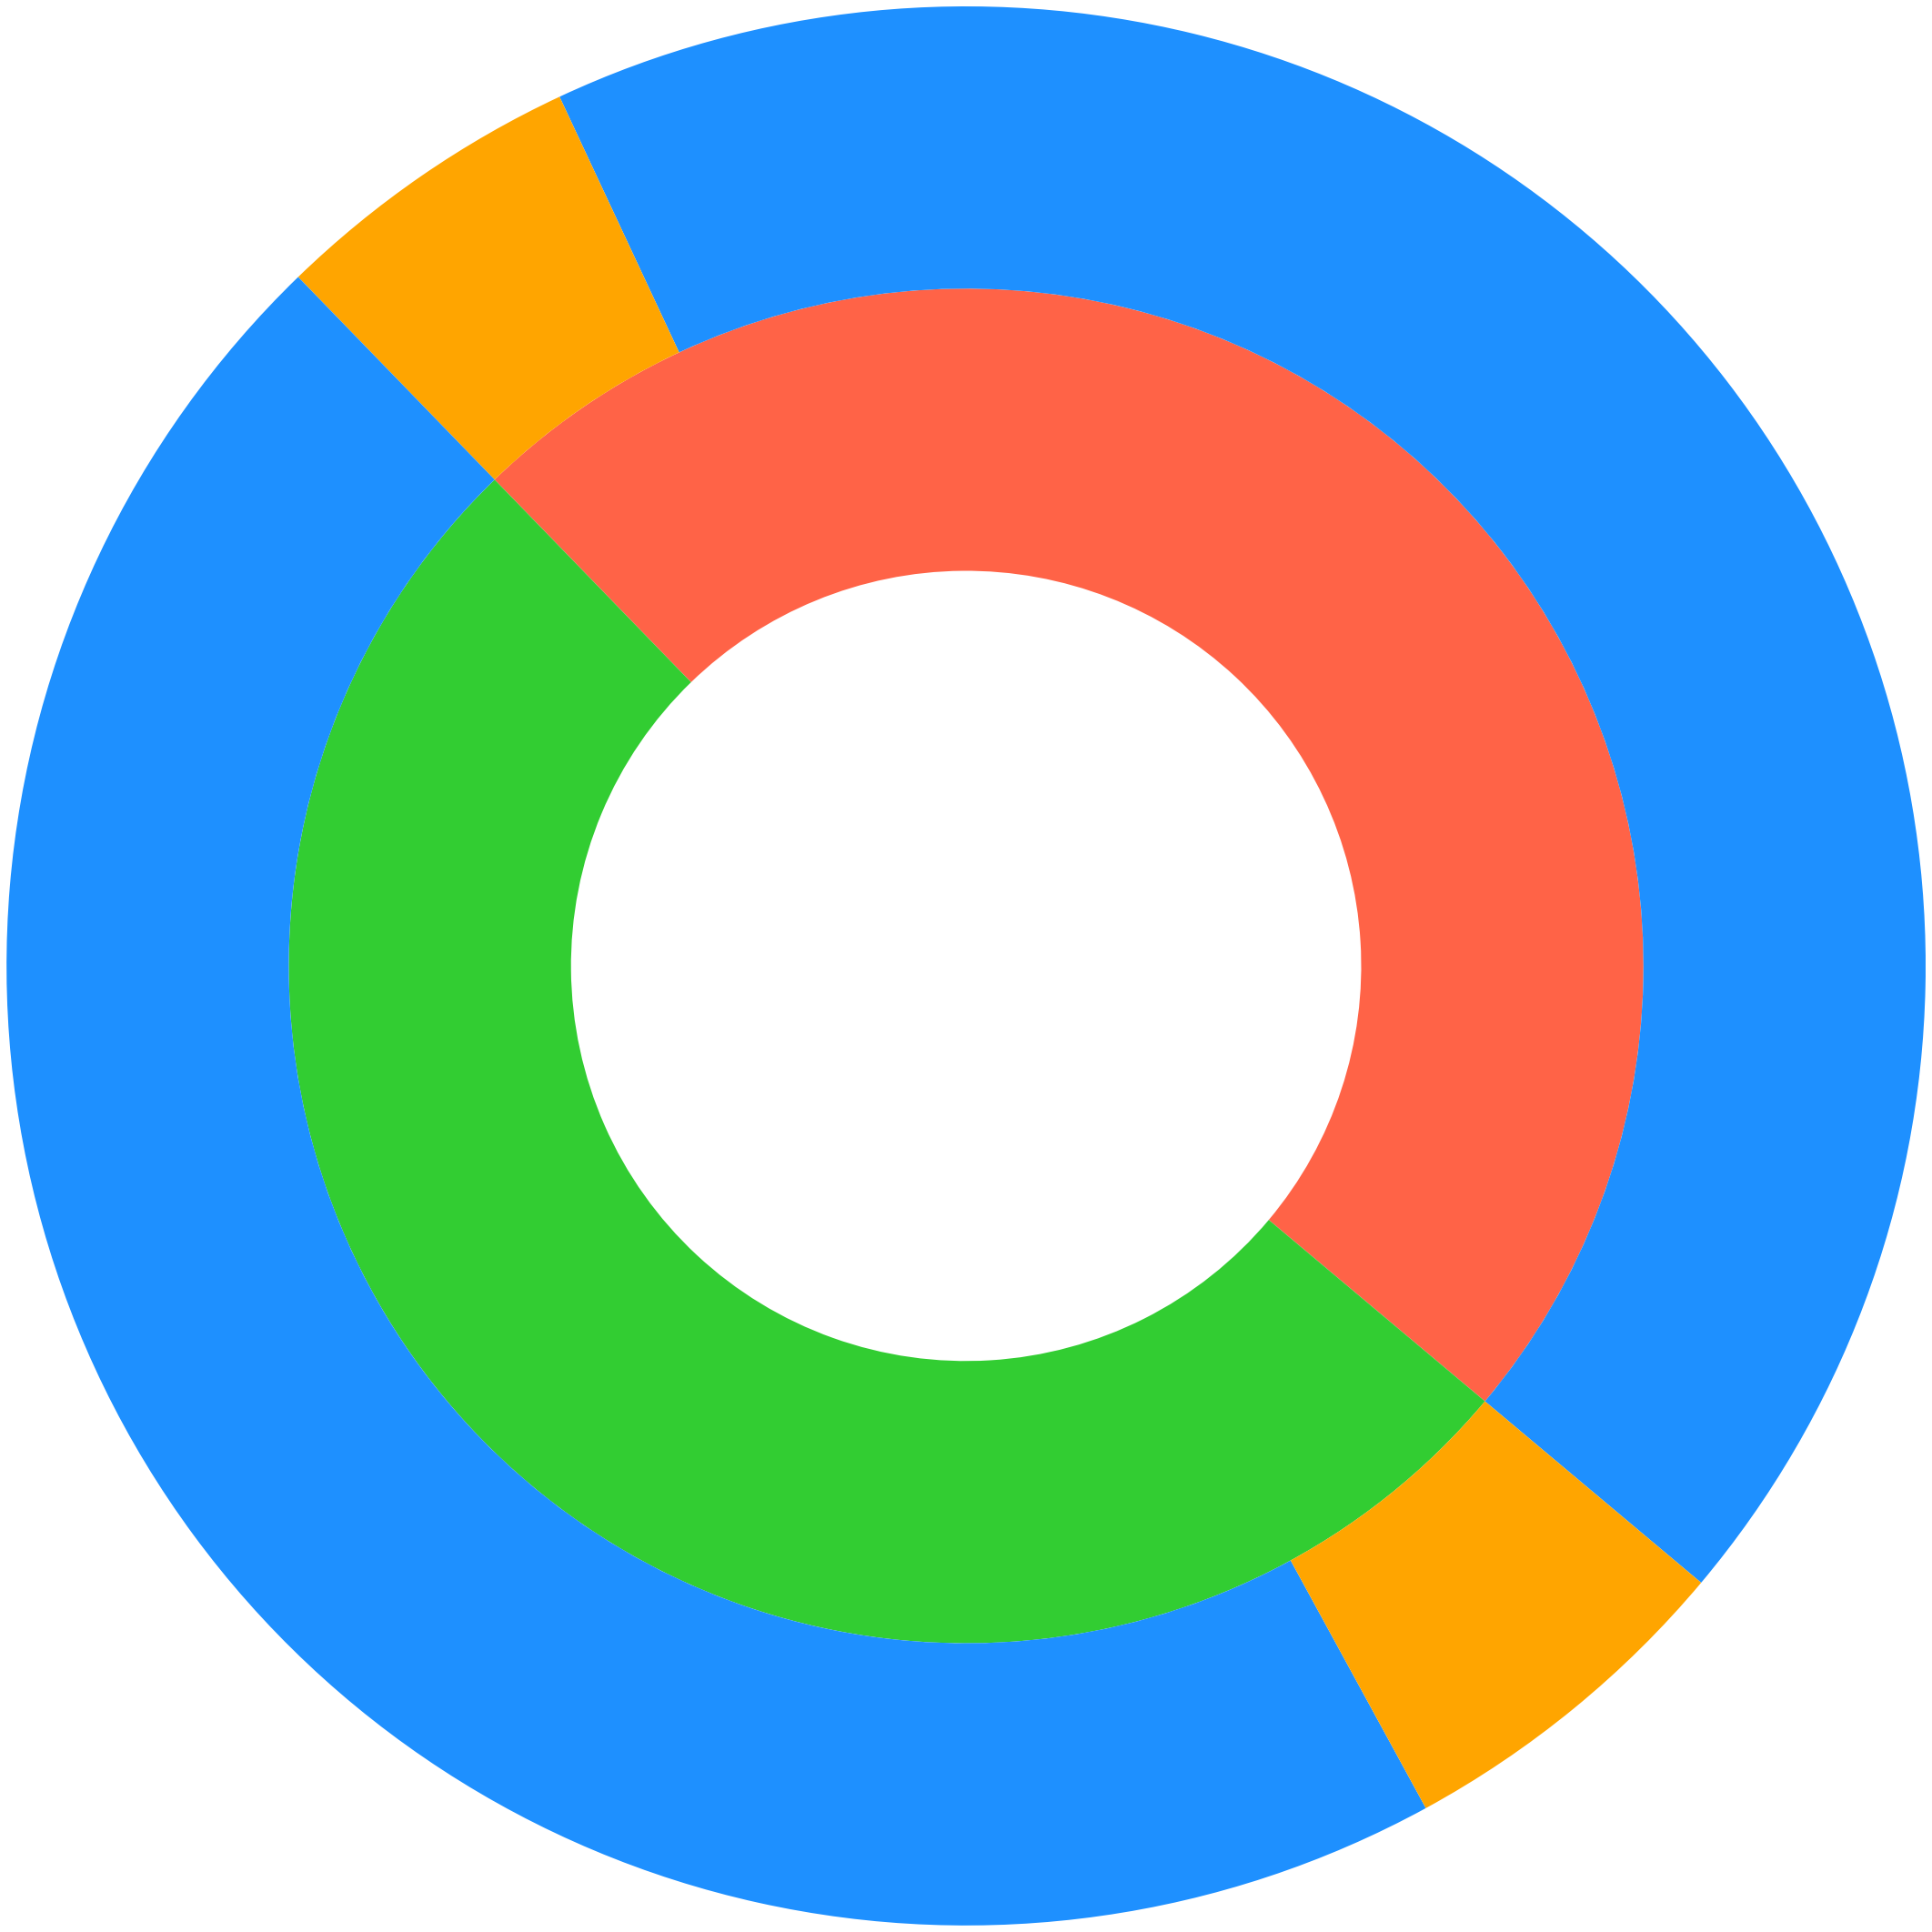

In [61]:
if dataset == "SENTIMENT140":
    with open("w2v_and_glove/datasets/sentiment_140/preprocessed_dataset/sentiment_140.pickle", "rb") as handle:
        dataset_pickle = pickle.load(handle)
        df_dataset = pd.DataFrame(dataset_pickle)
    
    # Pie chart values
    circle_labels = ["Sentiment 140\ndataset"]
    donut_1_labels = ["Negative", "Positive"]
    donut_2_labels = ["No rule", "A-but-B Rule"]

    circle = [len(df_dataset)]
    donut_1 = [len(df_dataset.loc[df_dataset["sentiment_label"]==0]), len(df_dataset.loc[df_dataset["sentiment_label"]==1])]
    donut_2 = [len(df_dataset.loc[(df_dataset["sentiment_label"]==0)&(df_dataset["rule_label"]==0)]), 
               len(df_dataset.loc[(df_dataset["sentiment_label"]==0)&(df_dataset["rule_label"]!=0)]),
               len(df_dataset.loc[(df_dataset["sentiment_label"]==1)&(df_dataset["rule_label"]==0)]),
               len(df_dataset.loc[(df_dataset["sentiment_label"]==1)&(df_dataset["rule_label"]!=0)])]

    fig, ax = plt.subplots(figsize=(30, 30), subplot_kw=dict(aspect="equal"))

    ax.pie(circle, pctdistance=0, labeldistance=-0.001, radius=1, colors=["white"])
    ax.pie(donut_1, wedgeprops=dict(width=0.5), startangle=-40, pctdistance=0.76, labeldistance=1.2, radius=1.2, colors=["tomato", "limegreen"])
    ax.pie(donut_2, wedgeprops=dict(width=0.5), startangle=-40, pctdistance=0.85, labeldistance=1.2, radius=1.7, colors=["dodgerblue", "orange"])

    fig.tight_layout()
    plt.savefig('analysis/CompLing_results/sentiment140_distribution.eps', bbox_inches='tight', facecolor='white', edgecolor='none', pad_inches = 0)
    fig.show()

elif dataset == "SST2":
    with open("w2v_and_glove/datasets/sst2/preprocessed_dataset/sst2.pickle", "rb") as handle:
        dataset_pickle = pickle.load(handle)
        df_dataset = pd.DataFrame(dataset_pickle)
    
    # Pie chart values
    circle_labels = ["SST2 dataset"]
    donut_1_labels = ["Negative", "Positive"]
    donut_2_labels = ["No rule", "A-but-B Rule"]

    circle = [len(df_dataset)]
    donut_1 = [len(df_dataset.loc[df_dataset["sentiment_label"]==0]), len(df_dataset.loc[df_dataset["sentiment_label"]==1])]
    donut_2 = [len(df_dataset.loc[(df_dataset["sentiment_label"]==0)&(df_dataset["rule_label"]==0)]), 
               len(df_dataset.loc[(df_dataset["sentiment_label"]==0)&(df_dataset["rule_label"]!=0)]),
               len(df_dataset.loc[(df_dataset["sentiment_label"]==1)&(df_dataset["rule_label"]==0)]),
               len(df_dataset.loc[(df_dataset["sentiment_label"]==1)&(df_dataset["rule_label"]!=0)])]

    fig, ax = plt.subplots(figsize=(30, 30), subplot_kw=dict(aspect="equal"))

    ax.pie(circle, pctdistance=0, labeldistance=0.2, radius=1, colors=["white"])
    wedges_1, texts = ax.pie(donut_1, wedgeprops=dict(width=0.5), startangle=-40, pctdistance=0.76, labeldistance=1.2, radius=1.2, colors=["tomato", "limegreen"])
    wedges_2, texts = ax.pie(donut_2, wedgeprops=dict(width=0.5), startangle=-40, pctdistance=0.85, labeldistance=1.2, radius=1.7, colors=["dodgerblue", "orange"])

    fig.tight_layout()
    plt.savefig('analysis/CompLing_results/sst2_distribution.eps', bbox_inches='tight', facecolor='white', edgecolor='none', pad_inches = 0)
    fig.show()

In [ ]:
import tensorflow as tf
from lime import lime_text

config = config
model = None
word_index = None

def vectorize(sentences):
    """
    tokenize each preprocessed sentence in dataset as sentence.split()
    encode each tokenized sentence as per vocabulary
    right pad each encoded tokenized sentence with 0 upto max_tokenized_sentence_len the dataset 
    """
    vocab = [key for key in word_index.keys()]
    vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(standardize=None, split='whitespace', vocabulary=vocab)
    return vectorize_layer(np.array(sentences)).numpy()

def prediction(text):
    x = vectorize(text)
    pred_prob_1 = model.predict(x, batch_size=50)
    pred_prob_0 = 1 - pred_prob_1
    prob = np.concatenate((pred_prob_0, pred_prob_1), axis=1)
    return prob

test_datapoint = 
explainer = lime_text.LimeTextExplainer(class_names=["negative_sentiment", "positive_sentiment"], split_expression=" ", random_state=11)
exp = explainer.explain_instance(test_datapoint, self.prediction, num_features = self.config["lime_num_of_features"], num_samples=self.config["lime_no_of_samples"])